In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data using Pandas
f1all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_1.xlsx')
f1all.columns = f1all.columns.str.lower()
f1all.columns = f1all.columns.str.strip()
f1all.columns = f1all.columns.str.replace(' |\n', '_')
f1all.columns = f1all.columns.str.replace('__', '_')
f1all['area_name'] = f1all['area_name'].str.replace('\d+', '')
f1all = f1all.applymap(lambda s:s.lower() if type(s) == str else s)
f1all.drop(['table_name'], inplace = True, axis = 1)
f1all['area_name'].astype(object)
f1all['area_name'] = f1all['area_name'].str.split('-').str[1]
f1all['area_name'] = f1all['area_name'].str.strip(' ')
f1all = f1all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f1all['total_ever_unmarried_women'] = f1all['total_women'] - f1all['total_ever_married_women']
f1all = f1all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'present_age','total_women', 'total_ever_married_women', 'parity_0', 'parity_1','parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+','total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'all/sc/st','total_ever_unmarried_women'], axis=1, inplace=False)
f1all = f1all.drop_duplicates()
f1all = f1all.reset_index(drop=True)
f1all

,state_code,distt._code,area_name,total/_rural/_urban,present_age,total_women,total_ever_married_women,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,parity_7+,total_children_ever_born_p,total_children_ever_born_m,total_children_ever_born_f,all/sc/st,total_ever_unmarried_women
0,18,0,assam,total,all_ages,12878491,6314946,931210,887716,1057759,985536,801672,573579,398629,678845,20145370,10548299,9597071,all,6563545
1,18,0,assam,total,less_than_15,4874847,26743,19698,3631,3414,0,0,0,0,0,10459,5278,5181,all,4848104
2,18,0,assam,total,15-19,1242426,255701,168781,65091,14673,3410,3746,0,0,0,119651,60930,58721,all,986725
3,18,0,assam,total,20-24,1157272,738470,226672,261305,161846,58196,18418,5532,2089,4412,907384,461459,445925,all,418802
4,18,0,assam,total,25-29,1190550,1024901,150400,211458,276890,203180,107028,44505,16809,14631,2264144,1153360,1110784,all,165649
5,18,0,assam,total,30-34,972087,910982,83102,105183,195089,198769,148338,89632,48251,42618,2779265,1420811,1358454,all,61105
6,18,0,assam,total,35-39,900579,870557,62170,70528,144730,176921,152935,108098,70607,84568,3146243,1624716,1521527,all,30022
7,18,0,assam,total,40-44,603378,587577,40475,40200,77739,106118,103706,78930,55397,85012,2354070,1233458,1120612,all,15801
8,18,0,assam,total,45-49,508502,499608,32656,31626,57931,80044,84601,69912,52398,90440,2145037,1141254,1003783,all,8894
9,18,0,assam,total,50-54,375830,370371,28982,24813,39258,51803,57219,50747,39786,77763,1636971,876295,760676,all,5459


In [4]:
f1all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85760 entries, 0 to 85759
Data columns (total 20 columns):
state_code                    85760 non-null int64
distt._code                   85760 non-null int64
area_name                     85616 non-null object
total/_rural/_urban           85760 non-null object
present_age                   85760 non-null object
total_women                   85760 non-null int64
total_ever_married_women      85760 non-null int64
parity_0                      85760 non-null int64
parity_1                      85760 non-null int64
parity_2                      85760 non-null int64
parity_3                      85760 non-null int64
parity_4                      85760 non-null int64
parity_5                      85760 non-null int64
parity_6                      85760 non-null int64
parity_7+                     85760 non-null int64
total_children_ever_born_p    85760 non-null int64
total_children_ever_born_m    85760 non-null int64
total_children_ever_b

In [5]:
f1all['parity_0_%'] = (f1all['parity_0'] /f1all['total_ever_married_women'])*100

In [6]:
f1all['parity_1_%'] = (f1all['parity_1'] /f1all['total_ever_married_women'])*100

In [7]:
f1all['parity_2_%'] = (f1all['parity_2'] /f1all['total_ever_married_women'])*100

In [8]:
f1all['parity_3_%'] = (f1all['parity_3'] /f1all['total_ever_married_women'])*100

In [9]:
f1all['parity_4_%'] = (f1all['parity_4'] /f1all['total_ever_married_women'])*100

In [10]:
f1all['parity_5_%'] = (f1all['parity_5'] /f1all['total_ever_married_women'])*100

In [11]:
f1all['parity_6_%'] = (f1all['parity_6'] /f1all['total_ever_married_women'])*100

In [12]:
f1all['parity_7+_%'] = (f1all['parity_7+'] /f1all['total_ever_married_women'])*100

In [13]:
f1all['total_ever_married_women_%'] = (f1all['total_ever_married_women'] /f1all['total_women'])*100

In [14]:
f1all['total_ever_unmarried_women_%'] = (f1all['total_ever_unmarried_women'] /f1all['total_women'])*100

In [15]:
f1all['total_children_ever_born_m_%'] = (f1all['total_children_ever_born_m']/f1all['total_children_ever_born_p'] )*100

In [16]:
f1all['total_children_ever_born_f_%'] = (f1all['total_children_ever_born_f'].div(f1all['total_children_ever_born_p'].where(f1all['total_children_ever_born_p'] != 0, np.nan)))*100

In [17]:
f1all.dropna(axis = 0, inplace = True)
f1all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82745 entries, 0 to 85759
Data columns (total 32 columns):
state_code                      82745 non-null int64
distt._code                     82745 non-null int64
area_name                       82745 non-null object
total/_rural/_urban             82745 non-null object
present_age                     82745 non-null object
total_women                     82745 non-null int64
total_ever_married_women        82745 non-null int64
parity_0                        82745 non-null int64
parity_1                        82745 non-null int64
parity_2                        82745 non-null int64
parity_3                        82745 non-null int64
parity_4                        82745 non-null int64
parity_5                        82745 non-null int64
parity_6                        82745 non-null int64
parity_7+                       82745 non-null int64
total_children_ever_born_p      82745 non-null int64
total_children_ever_born_m      82745 no

In [18]:
# To familiarize i the values
for column in f1all:
    print(f1all[column].unique())
    print('----------------------------------------------------------------------------------------')

[18 13 29 16  7 22 31 35  1  2  3  4  5  6  8  9 10 11 12 14 15 17 19 20
 21 23 24 25 26 27 28 30 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['assam' 'kokrajhar' 'dhubri' 'goalpara' 'bongaigaon' 'barpeta' 'kamrup'
 'nalbari' 'darrang' 'marigaon' 'nagaon' 'sonitpur' 'lakhimpur' 'dhemaji'
 'tinsukia' 'dibrugarh' 'sibsagar' 'jorhat' 'golaghat' 'karbi_anglong'
 'north_cachar_hills' 'cachar' 'karimganj' 'hailakandi' 'nagaland' 'mon'
 'tuensang' 'mokokchung' 'zunheboto' 'wokha' 'dimapur_*' 'kohima' 'phek'
 'karnataka' 'belgaum' 'bagalkot_*' 'bijapur' 'gulbarga' 'bidar' 'raichur'
 'koppal_*' 'gadag_*' 'dharwad' 'uttara_kannada' 'haveri_*

In [19]:
# Loading the data using Pandas
f2all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_2.xlsx')
f2all.columns = f2all.columns.str.lower()
f2all.columns = f2all.columns.str.strip()
f2all.columns = f2all.columns.str.replace(' |\n', '_')
f2all.columns = f2all.columns.str.replace('__', '_')
f2all = f2all.applymap(lambda s:s.lower() if type(s) == str else s)
f2all['area_name'] = f2all['area_name'].str.replace('\d+', '')
f2all.drop(['table_name'], inplace = True, axis = 1)
f2all['area_name'].astype(object)
f2all['area_name'] = f2all['area_name'].str.split('-').str[1]
f2all['area_name'] = f2all['area_name'].str.strip(' ')
f2all = f2all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f2all['total_ever_unmarried_women'] = f2all['total_women'] - f2all['total_ever_married_women']
f2all = f2all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'religious_community','present_age', 'total_women', 'total_ever_married_women', 'parity_0','parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6','parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'total_ever_unmarried_women'], axis=1, inplace=False)
f2all = f2all.drop_duplicates()
f2all = f2all.reset_index(drop=True)
f2all.head()

,state_code,distt._code,area_name,total/_rural/_urban,religious_community,present_age,total_women,total_ever_married_women,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,parity_7+,total_children_ever_born_p,total_children_ever_born_m,total_children_ever_born_f,total_ever_unmarried_women
0,35,0,andaman_&_nicobar_islands,total,all_religious_communities,all_ages,163180,86539,8869,13311,22224,17046,10201,5828,3407,5653,248836,128511,120325,76641
1,35,0,andaman_&_nicobar_islands,total,all_religious_communities,less_than_15,50854,177,103,24,50,0,0,0,0,0,124,70,54,50677
2,35,0,andaman_&_nicobar_islands,total,all_religious_communities,15-19,17647,2293,1556,579,109,24,25,0,0,0,969,483,486,15354
3,35,0,andaman_&_nicobar_islands,total,all_religious_communities,20-24,17334,10933,2920,4195,2950,656,106,22,10,74,13238,6652,6586,6401
4,35,0,andaman_&_nicobar_islands,total,all_religious_communities,25-29,17368,15374,1719,3486,6056,3006,710,200,43,154,30651,15470,15181,1994


In [20]:
f2all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women'],
      dtype='object')

In [21]:
f2all.dropna(axis = 0, inplace = True)
f2all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233344 entries, 0 to 233727
Data columns (total 20 columns):
state_code                    233344 non-null int64
distt._code                   233344 non-null int64
area_name                     233344 non-null object
total/_rural/_urban           233344 non-null object
religious_community           233344 non-null object
present_age                   233344 non-null object
total_women                   233344 non-null int64
total_ever_married_women      233344 non-null int64
parity_0                      233344 non-null int64
parity_1                      233344 non-null int64
parity_2                      233344 non-null int64
parity_3                      233344 non-null int64
parity_4                      233344 non-null int64
parity_5                      233344 non-null int64
parity_6                      233344 non-null int64
parity_7+                     233344 non-null int64
total_children_ever_born_p    233344 non-null int64
t

In [22]:
f2all['parity_0_%'] = (f2all['parity_0'] /f2all['total_ever_married_women'])*100

In [23]:
f2all['parity_1_%'] = (f2all['parity_1'] /f2all['total_ever_married_women'])*100

In [24]:
f2all['parity_2_%'] = (f2all['parity_2'] /f2all['total_ever_married_women'])*100

In [25]:
f2all['parity_3_%'] = (f2all['parity_3'] /f2all['total_ever_married_women'])*100

In [26]:
f2all['parity_4_%'] = (f2all['parity_4'] /f2all['total_ever_married_women'])*100

In [27]:
f2all['parity_5_%'] = (f2all['parity_5'] /f2all['total_ever_married_women'])*100

In [28]:
f2all['parity_6_%'] = (f2all['parity_6'] /f2all['total_ever_married_women'])*100

In [29]:
f2all['parity_7+_%'] = (f2all['parity_7+'] /f2all['total_ever_married_women'])*100

In [30]:
f2all['total_ever_married_women_%'] = (f2all['total_ever_married_women'] /f2all['total_women'])*100

In [31]:
f2all['total_ever_unmarried_women_%'] = (f2all['total_ever_unmarried_women'] /f2all['total_women'])*100

In [32]:
f2all['total_children_ever_born_m_%'] = (f2all['total_children_ever_born_m']/f2all['total_children_ever_born_p'] )*100

In [33]:
f2all['total_children_ever_born_f_%'] = (f2all['total_children_ever_born_f'].div(f2all['total_children_ever_born_p'].where(f2all['total_children_ever_born_p'] != 0, np.nan)))*100

In [34]:
f2all.dropna(axis = 0, inplace = True)
f2all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192598 entries, 0 to 233724
Data columns (total 32 columns):
state_code                      192598 non-null int64
distt._code                     192598 non-null int64
area_name                       192598 non-null object
total/_rural/_urban             192598 non-null object
religious_community             192598 non-null object
present_age                     192598 non-null object
total_women                     192598 non-null int64
total_ever_married_women        192598 non-null int64
parity_0                        192598 non-null int64
parity_1                        192598 non-null int64
parity_2                        192598 non-null int64
parity_3                        192598 non-null int64
parity_4                        192598 non-null int64
parity_5                        192598 non-null int64
parity_6                        192598 non-null int64
parity_7+                       192598 non-null int64
total_children_ever_b

In [35]:
# To familiarize i the values
for column in f2all:
    print(f2all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 20 28 15 29 19 33 10 12 32 18 31 13  4 23 22 16  7 27 25 26 24  6 30
  2  1  3  5  8  9 11 14 17 21 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'jharkhand' 'garhwa_*'
 'palamu' 'chatra_*' 'hazaribag' 'kodarma_*' 'giridih' 'deoghar' 'godda'
 'sahibganj' 'pakaur_*' 'dumka' 'dhanbad' 'bokaro_*' 'ranchi' 'lohardaga'
 'gumla' 'pashchimi_singhbhum' 'purbi_singhbhum' 'andhra_pradesh'
 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad' 'rangareddy'
 'mahbubnagar' 'nalgonda' 'warangal' 'khammam' 'srikakulam' 'vizianagaram'
 'visakhapatnam' 'east_godavari' 'west_godavari' 'krishna' 'guntu

 42.75618375]
----------------------------------------------------------------------------------------
[51.64485846 56.4516129  49.84520124 ... 58.1120944  59.22551253
 47.16157205]
----------------------------------------------------------------------------------------
[48.35514154 43.5483871  50.15479876 ... 41.8879056  40.77448747
 52.83842795]
----------------------------------------------------------------------------------------


In [36]:
# Loading the data using Pandas
f3all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_3.xlsx')
f3all.columns = f3all.columns.str.lower()
f3all.columns = f3all.columns.str.strip()
f3all.columns = f3all.columns.str.replace(' |\n', '_')
f3all.columns = f3all.columns.str.replace('__', '_')
f3all = f3all.applymap(lambda s:s.lower() if type(s) == str else s)
f3all['area_name'] = f3all['area_name'].str.replace('\d+', '')
f3all.drop(['table_name'], inplace = True, axis = 1)
f3all['area_name'].astype(object)
f3all['area_name'] = f3all['area_name'].str.split('-').str[1]
f3all['area_name'] = f3all['area_name'].str.strip(' ')
f3all = f3all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f3all['total_ever_unmarried_women'] = f3all['total_women'] - f3all['total_ever_married_women']
f3all = f3all.set_axis(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban', 'educational_level','present_age', 'total_women', 'total_ever_married_women', 'parity_0','parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6','parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'total_ever_unmarried_women'], axis=1, inplace=False)
f3all = f3all.drop_duplicates()
f3all = f3all.reset_index(drop=True)
f3all.head()

,state_code,distt._code,area_name,total/_rural/_urban,educational_level,present_age,total_women,total_ever_married_women,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,parity_7+,total_children_ever_born_p,total_children_ever_born_m,total_children_ever_born_f,total_ever_unmarried_women
0,35,0,andaman_&_nicobar_islands,total,total,all_ages,163180,86539,8869,13311,22224,17046,10201,5828,3407,5653,248836,128511,120325,76641
1,35,0,andaman_&_nicobar_islands,total,total,less_than_15,50854,177,103,24,50,0,0,0,0,0,124,70,54,50677
2,35,0,andaman_&_nicobar_islands,total,total,15-19,17647,2293,1556,579,109,24,25,0,0,0,969,483,486,15354
3,35,0,andaman_&_nicobar_islands,total,total,20-24,17334,10933,2920,4195,2950,656,106,22,10,74,13238,6652,6586,6401
4,35,0,andaman_&_nicobar_islands,total,total,25-29,17368,15374,1719,3486,6056,3006,710,200,43,154,30651,15470,15181,1994


In [37]:
f3all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women'],
      dtype='object')

In [38]:
f3all['parity_0_%'] = (f3all['parity_0'] /f3all['total_ever_married_women'])*100

In [39]:
f3all['parity_1_%'] = (f3all['parity_1'] /f3all['total_ever_married_women'])*100

In [40]:
f3all['parity_2_%'] = (f3all['parity_2'] /f3all['total_ever_married_women'])*100

In [41]:
f3all['parity_3_%'] = (f3all['parity_3'] /f3all['total_ever_married_women'])*100

In [42]:
f3all['parity_4_%'] = (f3all['parity_4'] /f3all['total_ever_married_women'])*100

In [43]:
f3all['parity_5_%'] = (f3all['parity_5'] /f3all['total_ever_married_women'])*100

In [44]:
f3all['parity_6_%'] = (f3all['parity_6'] /f3all['total_ever_married_women'])*100

In [45]:
f3all['parity_7+_%'] = (f3all['parity_7+'] /f3all['total_ever_married_women'])*100

In [46]:
f3all['total_ever_married_women_%'] = (f3all['total_ever_married_women'] /f3all['total_women'])*100

In [47]:
f3all['total_ever_unmarried_women_%'] = (f3all['total_ever_unmarried_women'] /f3all['total_women'])*100

In [48]:
f3all['total_children_ever_born_m_%'] = (f3all['total_children_ever_born_m']/f3all['total_children_ever_born_p'] )*100

In [49]:
f3all['total_children_ever_born_f_%'] = (f3all['total_children_ever_born_f'].div(f3all['total_children_ever_born_p'].where(f3all['total_children_ever_born_p'] != 0, np.nan)))*100

In [50]:
f3all.dropna(axis = 0, inplace = True)
f3all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216284 entries, 0 to 224895
Data columns (total 32 columns):
state_code                      216284 non-null int64
distt._code                     216284 non-null int64
area_name                       216284 non-null object
total/_rural/_urban             216284 non-null object
educational_level               216284 non-null object
present_age                     216284 non-null object
total_women                     216284 non-null int64
total_ever_married_women        216284 non-null int64
parity_0                        216284 non-null int64
parity_1                        216284 non-null int64
parity_2                        216284 non-null int64
parity_3                        216284 non-null int64
parity_4                        216284 non-null int64
parity_5                        216284 non-null int64
parity_6                        216284 non-null int64
parity_7+                       216284 non-null int64
total_children_ever_b

In [51]:
# To familiarize i the values
for column in f3all:
    print(f3all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 26 29 21 16 15  5 28 25  6 27 13  7 32  9 19 34 12  2 14 11 30  3 22
 18  1 31 17 33 24  4  8 10 20 23]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'dadra_&_nagar_haveli'
 'karnataka' 'belgaum' 'bagalkot_*' 'bijapur' 'gulbarga' 'bidar' 'raichur'
 'koppal_*' 'gadag_*' 'dharwad' 'uttara_kannada' 'haveri_*' 'bellary'
 'chitradurga' 'davanagere_*' 'shimoga' 'udupi_*' 'chikmagalur' 'tumkur'
 'kolar' 'bangalore' 'bangalore_rural' 'mandya' 'hassan'
 'dakshina_kannada' 'kodagu' 'mysore' 'chamarajanagar_*' 'orissa'
 'bargarh_*' 'jharsuguda_*' 'sambalpur' 'debagarh_*' 'sundargarh'
 'kendujhar' 'ma

[3.93695328 0.         0.0914662  ... 0.41876047 0.76441974 1.23796424]
----------------------------------------------------------------------------------------
[6.53231491 0.         0.6768499  ... 1.16600184 0.92127303 1.45934677]
----------------------------------------------------------------------------------------
[53.03284716  0.34805522 12.99370998 ... 93.46379648 93.5022742
 91.21706399]
----------------------------------------------------------------------------------------
[46.96715284 99.65194478 87.00629002 ...  6.53620352  6.4977258
  8.78293601]
----------------------------------------------------------------------------------------
[51.64485846 56.4516129  49.84520124 ... 51.86166069 51.53562654
 53.10367241]
----------------------------------------------------------------------------------------
[48.35514154 43.5483871  50.15479876 ... 48.13833931 48.46437346
 46.89632759]
----------------------------------------------------------------------------------------


In [52]:
f3all['educational_level'].unique()

array(['total', 'illiterate', 'literate', 'literate_but_below_primary',
       'primary_but_below_middle', 'middle_but_below_matric_or_secondary',
       'matric_or_secondary_but_below_graduate', 'graduate_and_above'],
      dtype=object)

In [53]:
# Loading the data using Pandas
f4all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_4.xlsx')
f4all.dropna(axis = 0, inplace = True)
f4all.columns = f4all.columns.str.lower()
f4all.columns = f4all.columns.str.strip()
f4all.columns = f4all.columns.str.replace(' |\n', '_')
f4all.columns = f4all.columns.str.replace('__', '_')
f4all['area_name'] = f4all['area_name'].str.replace('\d+', '')
f4all = f4all.applymap(lambda s:s.lower() if type(s) == str else s)
f4all.drop(['table_name'], inplace = True, axis = 1)
f4all['area_name'].astype(object)
f4all['area_name'] = f4all['area_name'].str.split('-').str[1]
f4all['area_name'] = f4all['area_name'].str.strip(' ')
f4all['total_ever_unmarried_women'] = f4all['total_women'] - f4all['total_ever_married_women']
f4all = f4all.set_axis(['state_code','distt._code', 'area_name', 'total/rural/urban', 'economic_activity','present_age', 'total_women', 'total_ever_married_women', 'parity_0','parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6','parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'total_ever_unmarried_women'], axis=1, inplace=False)
f4all = f4all.drop_duplicates()
f4all = f4all.reset_index(drop=True)
f4all.head()

,state_code,distt._code,area_name,total/rural/urban,economic_activity,present_age,total_women,total_ever_married_women,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,parity_7+,total_children_ever_born_p,total_children_ever_born_m,total_children_ever_born_f,total_ever_unmarried_women
0,12,0,arunachal pradesh,total,total main workers,all ages,147623,125486,15184,15499,17684,17727,16710,13788,10188,18706,459769,233707,226062,22137
1,12,0,arunachal pradesh,total,total main workers,less than 15,4747,178,109,27,42,0,0,0,0,0,111,60,51,4569
2,12,0,arunachal pradesh,total,total main workers,15-19,12122,3624,2075,1104,268,95,82,0,0,0,2253,1174,1079,8498
3,12,0,arunachal pradesh,total,total main workers,20-24,18134,13413,3407,4429,3178,1476,512,180,81,150,19813,10080,9733,4721
4,12,0,arunachal pradesh,total,total main workers,25-29,23331,20970,2630,3420,4834,4529,2985,1407,623,542,54528,27491,27037,2361


In [54]:
f4all['economic_activity'] = f4all['economic_activity'].str.strip()
f4all['economic_activity'] = f4all['economic_activity'].replace({'(a) cultivators':'cultivators','(b) agricultural labourers':'agricultural labourers','(c) other main workers':'other main workers','(d) other workers':'other workers','(i) manual':'manual','(ii) non-manual':'non-manual'})
f4all['economic_activity'].unique()

array(['total main workers', 'cultivators', 'agricultural labourers',
       'other main workers', 'manual', 'non-manual', 'marginal workers',
       'non-workers'], dtype=object)

In [55]:
f4all = f4all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)

In [56]:
f4all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women'],
      dtype='object')

In [57]:
f4all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239104 entries, 0 to 239103
Data columns (total 20 columns):
state_code                    239104 non-null int64
distt._code                   239104 non-null int64
area_name                     238720 non-null object
total/rural/urban             239104 non-null object
economic_activity             239104 non-null object
present_age                   239104 non-null object
total_women                   239104 non-null int64
total_ever_married_women      239104 non-null int64
parity_0                      239104 non-null int64
parity_1                      239104 non-null int64
parity_2                      239104 non-null int64
parity_3                      239104 non-null int64
parity_4                      239104 non-null int64
parity_5                      239104 non-null int64
parity_6                      239104 non-null int64
parity_7+                     239104 non-null int64
total_children_ever_born_p    239104 non-null int64
t

In [58]:
f4all['parity_0_%'] = (f4all['parity_0'] /f4all['total_ever_married_women'])*100

In [59]:
f4all['parity_1_%'] = (f4all['parity_1'] /f4all['total_ever_married_women'])*100

In [60]:
f4all['parity_2_%'] = (f4all['parity_2'] /f4all['total_ever_married_women'])*100

In [61]:
f4all['parity_3_%'] = (f4all['parity_3'] /f4all['total_ever_married_women'])*100

In [62]:
f4all['parity_4_%'] = (f4all['parity_4'] /f4all['total_ever_married_women'])*100

In [63]:
f4all['parity_5_%'] = (f4all['parity_5'] /f4all['total_ever_married_women'])*100

In [64]:
f4all['parity_6_%'] = (f4all['parity_6'] /f4all['total_ever_married_women'])*100

In [65]:
f4all['parity_7+_%'] = (f4all['parity_7+'] /f4all['total_ever_married_women'])*100

In [66]:
f4all['total_ever_married_women_%'] = (f4all['total_ever_married_women'] /f4all['total_women'])*100

In [67]:
f4all['total_ever_unmarried_women_%'] = (f4all['total_ever_unmarried_women'] /f4all['total_women'])*100

In [68]:
f4all['total_children_ever_born_m_%'] = (f4all['total_children_ever_born_m']/f4all['total_children_ever_born_p'] )*100

In [69]:
f4all['total_children_ever_born_f_%'] = (f4all['total_children_ever_born_f'].div(f4all['total_children_ever_born_p'].where(f4all['total_children_ever_born_p'] != 0, np.nan)))*100

In [70]:
f4all.dropna(axis = 0, inplace = True)
f4all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229240 entries, 0 to 239103
Data columns (total 32 columns):
state_code                      229240 non-null int64
distt._code                     229240 non-null int64
area_name                       229240 non-null object
total/rural/urban               229240 non-null object
economic_activity               229240 non-null object
present_age                     229240 non-null object
total_women                     229240 non-null int64
total_ever_married_women        229240 non-null int64
parity_0                        229240 non-null int64
parity_1                        229240 non-null int64
parity_2                        229240 non-null int64
parity_3                        229240 non-null int64
parity_4                        229240 non-null int64
parity_5                        229240 non-null int64
parity_6                        229240 non-null int64
parity_7+                       229240 non-null int64
total_children_ever_b

In [71]:
# To familiarize i the values
for column in f4all:
    print(f4all[column].unique())
    print('----------------------------------------------------------------------------------------')

[12 22 25  3 30  1  2  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21
 23 24 26 27 28 29 31 32 33 34 35]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['arunachal_pradesh' 'tawang' 'west_kameng' 'east_kameng' 'papum_pare_*'
 'lower_subansiri' 'upper_subansiri' 'west_siang' 'east_siang'
 'upper_siang_*' 'dibang_valley' 'lohit' 'changlang' 'tirap'
 'chhattisgarh' 'koriya_*' 'surguja' 'jashpur_*' 'raigarh' 'korba_*'
 'janjgir' 'bilaspur' 'kawardha_*' 'rajnandgaon' 'durg' 'raipur'
 'mahasamund_*' 'dhamtari_*' 'kanker_*' 'bastar' 'dantewada_*'
 'daman_&_diu' 'diu' 'daman' 'punjab' 'gurdaspur' 'amritsar' 'kapurthala'
 'jalandhar' 'hoshiarpur' 'na

  2.87345736]
----------------------------------------------------------------------------------------
[50.83139577 54.05405405 52.10830004 ... 51.53968675 51.22514372
 51.00373356]
----------------------------------------------------------------------------------------
[49.16860423 45.94594595 47.89169996 ... 48.46031325 48.77485628
 48.99626644]
----------------------------------------------------------------------------------------


In [72]:
f4all['economic_activity'].unique()

array(['total_main_workers', 'cultivators', 'agricultural_labourers',
       'other_main_workers', 'manual', 'non-manual', 'marginal_workers',
       'non-workers'], dtype=object)

In [73]:
# Loading the data using Pandas
f5all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_5.xlsx')
f5all.dropna(axis = 0, inplace = True)
f5all.columns = f5all.columns.str.lower()
f5all.columns = f5all.columns.str.strip()
f5all.columns = f5all.columns.str.replace(' |\n', '_')
f5all.columns = f5all.columns.str.replace('__', '_')
f5all['area_name'] = f5all['area_name'].str.replace('\d+', '')
f5all = f5all.applymap(lambda s:s.lower() if type(s) == str else s)
f5all.drop(['table_name'], inplace = True, axis = 1)
f5all['area_name'].astype(object)
f5all['total_ever_unmarried_women'] = f5all['total_women'] - f5all['total_ever_married_women']
f5all = f5all.set_axis(['state_code','distt._code','area_name','total/_rural/_urban', 'present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f', 'all/sc/st','total_ever_unmarried_women'], axis=1, inplace=False)
f5all['area_name'] = f5all['area_name'].str.split('-').str[1]
f5all['area_name'] = f5all['area_name'].str.strip(' ')
f5all['total_ever_unmarried_women'] = f5all['total_women'] - f5all['total_ever_married_women']
f5all = f5all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f5all = f5all.drop_duplicates()
f5all = f5all.reset_index(drop=True)
f5all.head()

,state_code,distt._code,area_name,total/_rural/_urban,present_age,total_women,total_ever_married_women,no._of_surv._child._0,no._of_surv._child._1,no._of_surv._child._2,no._of_surv._child._3,no._of_surv._child._4,no._of_surv._child._5+,ttl_surv._child._p,ttl_surv._child._m,ttl_surv._child._f,all/sc/st,total_ever_unmarried_women
0,35,0,andaman_&_nicobar_islands,total,all_ages,163180,86539,9728,14612,23865,17762,9753,10819,221525,114533,106992,all,76641
1,35,0,andaman_&_nicobar_islands,total,less_than_15,50854,177,111,20,46,0,0,0,112,64,48,all,50677
2,35,0,andaman_&_nicobar_islands,total,15-19,17647,2293,1595,562,94,20,22,0,898,443,455,all,15354
3,35,0,andaman_&_nicobar_islands,total,20-24,17334,10933,3122,4221,2935,543,59,53,12318,6163,6155,all,6401
4,35,0,andaman_&_nicobar_islands,total,25-29,17368,15374,1861,3726,6200,2834,541,212,28452,14344,14108,all,1994


In [74]:
f5all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_ever_married_women',
       'no._of_surv._child._0', 'no._of_surv._child._1',
       'no._of_surv._child._2', 'no._of_surv._child._3',
       'no._of_surv._child._4', 'no._of_surv._child._5+', 'ttl_surv._child._p',
       'ttl_surv._child._m', 'ttl_surv._child._f', 'all/sc/st',
       'total_ever_unmarried_women'],
      dtype='object')

In [75]:
f5all['total_ever_unmarried_women_%'] = (f5all['total_ever_unmarried_women'] /f5all['total_women'])*100

In [76]:
f5all['total_ever_married_women_%'] = (f5all['total_ever_married_women'] /f5all['total_women'])*100

In [77]:
f5all['ttl_surv._child._m_%'] = (f5all['ttl_surv._child._m'] /f5all['ttl_surv._child._p'])*100

In [78]:
f5all['ttl_surv._child._f_%'] = (f5all['ttl_surv._child._f'] /f5all['ttl_surv._child._p'])*100

In [79]:
f5all['no._of_surv._child._0_%'] = (f5all['no._of_surv._child._0'] /f5all['total_ever_married_women'])*100

In [80]:
f5all['no._of_surv._child._1_%'] = (f5all['no._of_surv._child._1'] /f5all['total_ever_married_women'])*100

In [81]:
f5all['no._of_surv._child._2_%'] = (f5all['no._of_surv._child._2'] /f5all['total_ever_married_women'])*100

In [82]:
f5all['no._of_surv._child._3_%'] = (f5all['no._of_surv._child._3'] /f5all['total_ever_married_women'])*100

In [83]:
f5all['no._of_surv._child._4_%'] = (f5all['no._of_surv._child._4'] /f5all['total_ever_married_women'])*100

In [84]:
f5all['no._of_surv._child._5+_%'] = (f5all['no._of_surv._child._5+'] /f5all['total_ever_married_women'])*100

In [85]:
f5all.dropna(axis = 0, inplace = True)
f5all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79709 entries, 0 to 82351
Data columns (total 28 columns):
state_code                      79709 non-null int64
distt._code                     79709 non-null int64
area_name                       79709 non-null object
total/_rural/_urban             79709 non-null object
present_age                     79709 non-null object
total_women                     79709 non-null int64
total_ever_married_women        79709 non-null int64
no._of_surv._child._0           79709 non-null int64
no._of_surv._child._1           79709 non-null int64
no._of_surv._child._2           79709 non-null int64
no._of_surv._child._3           79709 non-null int64
no._of_surv._child._4           79709 non-null int64
no._of_surv._child._5+          79709 non-null int64
ttl_surv._child._p              79709 non-null int64
ttl_surv._child._m              79709 non-null int64
ttl_surv._child._f              79709 non-null int64
all/sc/st                       79709 no

In [86]:
# To familiarize i the values
for column in f5all:
    print(f5all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 28 12 18 10  4 22 26 25  7 30 24  6  2  1  3  5  8  9 11 13 14 15 16
 17 19 20 21 23 27 29 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'andhra_pradesh'
 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad' 'rangareddy'
 'mahbubnagar' 'nalgonda' 'warangal' 'khammam' 'srikakulam' 'vizianagaram'
 'visakhapatnam' 'east_godavari' 'west_godavari' 'krishna' 'guntur'
 'prakasam' 'nellore' 'cuddapah' 'kurnool' 'anantapur' 'chittoor'
 'arunachal_pradesh' 'tawang' 'west_kameng' 'east_kameng' 'papum_pare_*'
 'lower_subansiri' 'upper_subansiri' 'west_siang' 'east_siang'
 'upper_siang_

In [87]:
f5all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_ever_married_women',
       'no._of_surv._child._0', 'no._of_surv._child._1',
       'no._of_surv._child._2', 'no._of_surv._child._3',
       'no._of_surv._child._4', 'no._of_surv._child._5+', 'ttl_surv._child._p',
       'ttl_surv._child._m', 'ttl_surv._child._f', 'all/sc/st',
       'total_ever_unmarried_women', 'total_ever_unmarried_women_%',
       'total_ever_married_women_%', 'ttl_surv._child._m_%',
       'ttl_surv._child._f_%', 'no._of_surv._child._0_%',
       'no._of_surv._child._1_%', 'no._of_surv._child._2_%',
       'no._of_surv._child._3_%', 'no._of_surv._child._4_%',
       'no._of_surv._child._5+_%'],
      dtype='object')

In [88]:
# Loading the data using Pandas
f6all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_6.xlsx')
f6all.dropna(axis = 0, inplace = True)
f6all.columns = f6all.columns.str.lower()
f6all.columns = f6all.columns.str.strip()
f6all.columns = f6all.columns.str.replace(' |\n', '_')
f6all.columns = f6all.columns.str.replace('__', '_')
f6all = f6all.applymap(lambda s:s.lower() if type(s) == str else s)
f6all['area_name'] = f6all['area_name'].str.replace('\d+', '')
f6all.drop(['table_name'], inplace = True, axis = 1)
f6all['area_name'].astype(object)
f6all['area_name'] = f6all['area_name'].str.split('-').str[1]
f6all['area_name'] = f6all['area_name'].str.strip(' ')
f6all['total_ever_unmarried_women'] = f6all['total_women'] - f6all['total_ever_married_women']
f6all = f6all.set_axis(['state_code','distt._code','area_name','total/_rural/_urban', 'religious_community','present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f','total_ever_unmarried_women'], axis=1, inplace=False)
f6all = f6all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f6all = f6all.drop_duplicates()
f6all = f6all.reset_index(drop=True)
f6all.head()

,state_code,distt._code,area_name,total/_rural/_urban,religious_community,present_age,total_women,total_ever_married_women,no._of_surv._child._0,no._of_surv._child._1,no._of_surv._child._2,no._of_surv._child._3,no._of_surv._child._4,no._of_surv._child._5+,ttl_surv._child._p,ttl_surv._child._m,ttl_surv._child._f,total_ever_unmarried_women
0,17,0,meghalaya,total,all_religious_communities,all_ages,1142735,487579,100457,68691,71078,66223,57333,123797,1433078,720828,712250,655156
1,17,0,meghalaya,total,all_religious_communities,less_than_15,484180,2476,2142,129,205,0,0,0,539,259,280,481704
2,17,0,meghalaya,total,all_religious_communities,15-19,122923,19203,13431,4461,892,177,242,0,7744,3766,3978,103720
3,17,0,meghalaya,total,all_religious_communities,20-24,100741,60208,21149,18890,12459,5243,1531,936,71336,35781,35555,40533
4,17,0,meghalaya,total,all_religious_communities,25-29,96904,82206,16093,14822,18624,15882,10027,6758,179544,90094,89450,14698


In [89]:
f6all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213142 entries, 0 to 213141
Data columns (total 18 columns):
state_code                    213142 non-null int64
distt._code                   213142 non-null int64
area_name                     212758 non-null object
total/_rural/_urban           213142 non-null object
religious_community           213142 non-null object
present_age                   213142 non-null object
total_women                   213142 non-null int64
total_ever_married_women      213142 non-null int64
no._of_surv._child._0         213142 non-null int64
no._of_surv._child._1         213142 non-null int64
no._of_surv._child._2         213142 non-null int64
no._of_surv._child._3         213142 non-null int64
no._of_surv._child._4         213142 non-null int64
no._of_surv._child._5+        213142 non-null int64
ttl_surv._child._p            213142 non-null int64
ttl_surv._child._m            213142 non-null int64
ttl_surv._child._f            213142 non-null int64
t

In [90]:
f6all['total_ever_unmarried_women_%'] = (f6all['total_ever_unmarried_women'] /f6all['total_women'])*100

In [91]:
f6all['total_ever_married_women_%'] = (f6all['total_ever_married_women'] /f6all['total_women'])*100

In [92]:
f6all['ttl_surv._child._m_%'] = (f6all['ttl_surv._child._m'] /f6all['ttl_surv._child._p'])*100

In [93]:
f6all['ttl_surv._child._f_%'] = (f6all['ttl_surv._child._f'] /f6all['ttl_surv._child._p'])*100

In [94]:
f6all['no._of_surv._child._0_%'] = (f6all['no._of_surv._child._0'] /f6all['total_ever_married_women'])*100

In [95]:
f6all['no._of_surv._child._1_%'] = (f6all['no._of_surv._child._1'] /f6all['total_ever_married_women'])*100

In [96]:
f6all['no._of_surv._child._2_%'] = (f6all['no._of_surv._child._2'] /f6all['total_ever_married_women'])*100

In [97]:
f6all['no._of_surv._child._3_%'] = (f6all['no._of_surv._child._3'] /f6all['total_ever_married_women'])*100

In [98]:
f6all['no._of_surv._child._4_%'] = (f6all['no._of_surv._child._4'] /f6all['total_ever_married_women'])*100

In [99]:
f6all['no._of_surv._child._5+_%'] = (f6all['no._of_surv._child._5+'] /f6all['total_ever_married_women'])*100

In [100]:
f6all.dropna(axis = 0, inplace = True)
f6all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173397 entries, 0 to 213141
Data columns (total 28 columns):
state_code                      173397 non-null int64
distt._code                     173397 non-null int64
area_name                       173397 non-null object
total/_rural/_urban             173397 non-null object
religious_community             173397 non-null object
present_age                     173397 non-null object
total_women                     173397 non-null int64
total_ever_married_women        173397 non-null int64
no._of_surv._child._0           173397 non-null int64
no._of_surv._child._1           173397 non-null int64
no._of_surv._child._2           173397 non-null int64
no._of_surv._child._3           173397 non-null int64
no._of_surv._child._4           173397 non-null int64
no._of_surv._child._5+          173397 non-null int64
ttl_surv._child._p              173397 non-null int64
ttl_surv._child._m              173397 non-null int64
ttl_surv._child._f   

In [101]:
# To familiarize i the values
for column in f6all:
    print(f6all[column].unique())
    print('----------------------------------------------------------------------------------------')

[17  7 31 35  6 16 19 23 11 28 12 24 30 15 34 27  9  2 21 10 13 18  5  1
  3  4  8 14 20 22 25 26 29 32 33]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
----------------------------------------------------------------------------------------
['meghalaya' 'west_garo_hills' 'east_garo_hills' 'south_garo_hills_*'
 'west_khasi_hills' 'ri_bhoi_*' 'east_khasi_hills' 'jaintia_hills' 'delhi'
 'north_west_*' 'north_*' 'north_east_*' 'east_*' 'new_delhi' 'central_*'
 'west_*' 'south_west_*' 'south_*' 'lakshadweep'
 'andaman_&_nicobar_islands' 'andamans' 'nicobars' 'haryana' 'panchkula_*'
 'ambala' 'yamunanagar' 'kurukshetra' 'kaithal' 'karnal' 'panipat'
 'sonipat' 'jind' 'fatehabad_*' 'sirsa' 'hisar' 'bhiwani' 'rohtak'
 'jhajjar_*' 'mahendragarh' 'rewari' 'gurgaon' 'faridabad' 'tripura'
 'west_tripura' 'south_trip

In [102]:
# Loading the data using Pandas
f7all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_7.xlsx')
f7all.dropna(axis = 0, inplace = True)
f7all.columns = f7all.columns.str.lower()
f7all.columns = f7all.columns.str.strip()
f7all.columns = f7all.columns.str.replace(' |\n', '_')
f7all.columns = f7all.columns.str.replace('__', '_')
f7all['area_name'] = f7all['area_name'].str.replace('\d+', '')
f7all = f7all.applymap(lambda s:s.lower() if type(s) == str else s)
f7all.drop(['table_name'], inplace = True, axis = 1)
f7all['area_name'].astype(object)
f7all['area_name'] = f7all['area_name'].str.split('-').str[1]
f7all['area_name'] = f7all['area_name'].str.strip(' ')
f7all['total_ever_unmarried_women'] = f7all['total_women'] - f7all['total_ever_married_women']
f7all = f7all.set_axis(['state_code','distt._code','area_name','total/_rural/_urban', 'educational_level','present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f','total_ever_unmarried_women'], axis=1, inplace=False)
f7all = f7all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f7all = f7all.drop_duplicates()
f7all = f7all.reset_index(drop=True)
f7all.head()

,state_code,distt._code,area_name,total/_rural/_urban,educational_level,present_age,total_women,total_ever_married_women,no._of_surv._child._0,no._of_surv._child._1,no._of_surv._child._2,no._of_surv._child._3,no._of_surv._child._4,no._of_surv._child._5+,ttl_surv._child._p,ttl_surv._child._m,ttl_surv._child._f,total_ever_unmarried_women
0,7,0,delhi,total,total,all_ages,6243273,3326640,390140,516890,864190,673286,430666,451468,8688688,4663926,4024762,2916633
1,7,0,delhi,total,total,less_than_15,2090238,8590,6729,417,1444,0,0,0,3305,1739,1566,2081648
2,7,0,delhi,total,total,15-19,611482,76991,56300,15508,3558,805,820,0,28319,14604,13715,534491
3,7,0,delhi,total,total,20-24,612254,394851,137239,137105,84722,27110,5929,2746,429257,223285,205972,217403
4,7,0,delhi,total,total,25-29,614207,567630,78932,137466,180961,109795,43775,16701,1108313,585903,522410,46577


In [103]:
f7all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women',
       'total_ever_married_women', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_women'],
      dtype='object')

In [104]:
f7all['total_ever_unmarried_women_%'] = (f7all['total_ever_unmarried_women'] /f7all['total_women'])*100
f7all['total_ever_unmarried_women_%'] = (f7all['total_ever_unmarried_women'] /f7all['total_women'])*100
f7all['total_ever_married_women_%'] = (f7all['total_ever_married_women'] /f7all['total_women'])*100
f7all['ttl_surv._child._m_%'] = (f7all['ttl_surv._child._m'] /f7all['ttl_surv._child._p'])*100
f7all['ttl_surv._child._f_%'] = (f7all['ttl_surv._child._f'] /f7all['ttl_surv._child._p'])*100
f7all['no._of_surv._child._0_%'] = (f7all['no._of_surv._child._0'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._1_%'] = (f7all['no._of_surv._child._1'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._2_%'] = (f7all['no._of_surv._child._2'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._3_%'] = (f7all['no._of_surv._child._3'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._4_%'] = (f7all['no._of_surv._child._4'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._5+_%'] = (f7all['no._of_surv._child._5+'] /f7all['total_ever_married_women'])*100

In [105]:
f7all.dropna(axis = 0, inplace = True)
f7all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229931 entries, 0 to 239102
Data columns (total 28 columns):
state_code                      229931 non-null int64
distt._code                     229931 non-null int64
area_name                       229931 non-null object
total/_rural/_urban             229931 non-null object
educational_level               229931 non-null object
present_age                     229931 non-null object
total_women                     229931 non-null int64
total_ever_married_women        229931 non-null int64
no._of_surv._child._0           229931 non-null int64
no._of_surv._child._1           229931 non-null int64
no._of_surv._child._2           229931 non-null int64
no._of_surv._child._3           229931 non-null int64
no._of_surv._child._4           229931 non-null int64
no._of_surv._child._5+          229931 non-null int64
ttl_surv._child._p              229931 non-null int64
ttl_surv._child._m              229931 non-null int64
ttl_surv._child._f   

In [106]:
# To familiarize i the values
for column in f7all:
    print(f7all[column].unique())
    print('----------------------------------------------------------------------------------------')

[ 7 29  8 35 16 12 21 11  5 30 23 31  9 18 32 33 10 34 28  6 19 27  3 24
  4  2 14 22 26 25  1 13 15 17 20]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['delhi' 'north_west_*' 'north_*' 'north_east_*' 'east_*' 'new_delhi'
 'central_*' 'west_*' 'south_west_*' 'south_*' 'karnataka' 'belgaum'
 'bagalkot_*' 'bijapur' 'gulbarga' 'bidar' 'raichur' 'koppal_*' 'gadag_*'
 'dharwad' 'uttara_kannada' 'haveri_*' 'bellary' 'chitradurga'
 'davanagere_*' 'shimoga' 'udupi_*' 'chikmagalur' 'tumkur' 'kolar'
 'bangalore' 'bangalore_rural' 'mandya' 'hassan' 'dakshina_kannada'
 'kodagu' 'mysore' 'chamarajanagar_*' 'rajasthan' 'ganganagar'
 'hanumangarh_*' 'bikan

 12.47637051]
----------------------------------------------------------------------------------------
[25.97786355 16.81024447  4.62131937 ... 17.27188082 18.69040051
 27.91762014]
----------------------------------------------------------------------------------------
[20.23922035  0.          1.04557676 ... 11.79245283 19.67963387
 15.6899811 ]
----------------------------------------------------------------------------------------
[12.94597552  0.          1.06505955 ... 13.79529561 14.36672968
 12.77173913]
----------------------------------------------------------------------------------------
[13.57129115  0.          0.69545221 ... 67.33333333 25.11125238
 30.24574669]
----------------------------------------------------------------------------------------


In [107]:
# Loading the data using Pandas
f8all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_8.xlsx')
f8all.dropna(axis = 0, inplace = True)
f8all.columns = f8all.columns.str.lower()
f8all.columns = f8all.columns.str.strip()
f8all.columns = f8all.columns.str.replace(' |\n', '_')
f8all.columns = f8all.columns.str.replace('__', '_')
f8all['area_name'] = f8all['area_name'].str.replace('\d+', '')
f8all = f8all.applymap(lambda s:s.lower() if type(s) == str else s)
f8all.drop(['table_name'], inplace = True, axis = 1)
f8all['area_name'].astype(object)
f8all['area_name'] = f8all['area_name'].str.split('-').str[1]
f8all['area_name'] = f8all['area_name'].str.strip(' ')
f8all = f8all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f8all['area_name'] = f8all['area_name'].str.rstrip('_')
f8all['total_ever_unmarried_women'] = f8all['total_women'] - f8all['total_ever_married_women']
f8all = f8all.set_axis(['state_code','distt._code','area_name','total/rural/urban', 'economic_activity','present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f','total_ever_unmarried_women'], axis=1, inplace=False)
f8all = f8all.drop_duplicates()
f8all = f8all.reset_index(drop=True)
f8all.head()

,state_code,distt._code,area_name,total/rural/urban,economic_activity,present_age,total_women,total_ever_married_women,no._of_surv._child._0,no._of_surv._child._1,no._of_surv._child._2,no._of_surv._child._3,no._of_surv._child._4,no._of_surv._child._5+,ttl_surv._child._p,ttl_surv._child._m,ttl_surv._child._f,total_ever_unmarried_women
0,22,0,chhattisgarh,total,total_main_workers,all_ages,2311871,2081060,273919,283232,378843,452967,339108,352991,5853279,2941487,2911792,230811
1,22,0,chhattisgarh,total,total_main_workers,less_than_15,59133,2826,2056,271,499,0,0,0,1269,643,626,56307
2,22,0,chhattisgarh,total,total_main_workers,15-19,182788,62947,45601,14099,2201,472,574,0,22213,11221,10992,119841
3,22,0,chhattisgarh,total,total_main_workers,20-24,268917,237854,70512,84207,56639,20573,3853,2070,288617,145309,143308,31063
4,22,0,chhattisgarh,total,total_main_workers,25-29,303999,292267,36535,51096,81543,80673,31662,10758,654926,330380,324546,11732


In [108]:
f8all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women',
       'total_ever_married_women', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_women'],
      dtype='object')

In [109]:
f8all.dropna(axis = 0, inplace = True)
f8all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221440 entries, 0 to 221823
Data columns (total 18 columns):
state_code                    221440 non-null int64
distt._code                   221440 non-null int64
area_name                     221440 non-null object
total/rural/urban             221440 non-null object
economic_activity             221440 non-null object
present_age                   221440 non-null object
total_women                   221440 non-null int64
total_ever_married_women      221440 non-null int64
no._of_surv._child._0         221440 non-null int64
no._of_surv._child._1         221440 non-null int64
no._of_surv._child._2         221440 non-null int64
no._of_surv._child._3         221440 non-null int64
no._of_surv._child._4         221440 non-null int64
no._of_surv._child._5+        221440 non-null int64
ttl_surv._child._p            221440 non-null int64
ttl_surv._child._m            221440 non-null int64
ttl_surv._child._f            221440 non-null int64
t

In [110]:
f8all['economic_activity'] = f8all['economic_activity'].str.strip()
f8all['economic_activity'] = f8all['economic_activity'].replace({'__(a)_cultivators':'cultivators','__(b)_agricultural_labourers':'agricultural labourers','______(i)_manual':'manual','______(ii)_non-manual':'non-manual','__(c)_other_main_workers':'other workers'})
f8all['economic_activity'].unique()

array(['total_main_workers', 'cultivators', 'agricultural labourers',
       'other workers', 'manual', 'non-manual', 'marginal_workers',
       'non-workers'], dtype=object)

In [111]:
f8all = f8all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)

In [112]:
f8all['total_ever_unmarried_women_%'] = (f8all['total_ever_unmarried_women'] /f8all['total_women'])*100
f8all['total_ever_unmarried_women_%'] = (f8all['total_ever_unmarried_women'] /f8all['total_women'])*100
f8all['total_ever_married_women_%'] = (f8all['total_ever_married_women'] /f8all['total_women'])*100
f8all['ttl_surv._child._m_%'] = (f8all['ttl_surv._child._m'] /f8all['ttl_surv._child._p'])*100
f8all['ttl_surv._child._f_%'] = (f8all['ttl_surv._child._f'] /f8all['ttl_surv._child._p'])*100
f8all['no._of_surv._child._0_%'] = (f8all['no._of_surv._child._0'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._1_%'] = (f8all['no._of_surv._child._1'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._2_%'] = (f8all['no._of_surv._child._2'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._3_%'] = (f8all['no._of_surv._child._3'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._4_%'] = (f8all['no._of_surv._child._4'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._5+_%'] = (f8all['no._of_surv._child._5+'] /f8all['total_ever_married_women'])*100

In [113]:
# To familiarize i the values
for column in f8all:
    print(f8all[column].unique())
    print('----------------------------------------------------------------------------------------')

[22 20 28 35 27 29  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 21 23 24 25 26 30 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['chhattisgarh' 'koriya_*' 'surguja' 'jashpur_*' 'raigarh' 'korba_*'
 'janjgir' 'bilaspur' 'kawardha_*' 'rajnandgaon' 'durg' 'raipur'
 'mahasamund_*' 'dhamtari_*' 'kanker_*' 'bastar' 'dantewada_*' 'jharkhand'
 'garhwa_*' 'palamu' 'chatra_*' 'hazaribag' 'kodarma_*' 'giridih'
 'deoghar' 'godda' 'sahibganj' 'pakaur_*' 'dumka' 'dhanbad' 'bokaro_*'
 'ranchi' 'lohardaga' 'gumla' 'pashchimi_singhbhum' 'purbi_singhbhum'
 'andhra_pradesh' 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad'
 'ranga

In [114]:
f8all.dropna(axis = 0, inplace = True)
f8all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212009 entries, 0 to 221823
Data columns (total 28 columns):
state_code                      212009 non-null int64
distt._code                     212009 non-null int64
area_name                       212009 non-null object
total/rural/urban               212009 non-null object
economic_activity               212009 non-null object
present_age                     212009 non-null object
total_women                     212009 non-null int64
total_ever_married_women        212009 non-null int64
no._of_surv._child._0           212009 non-null int64
no._of_surv._child._1           212009 non-null int64
no._of_surv._child._2           212009 non-null int64
no._of_surv._child._3           212009 non-null int64
no._of_surv._child._4           212009 non-null int64
no._of_surv._child._5+          212009 non-null int64
ttl_surv._child._p              212009 non-null int64
ttl_surv._child._m              212009 non-null int64
ttl_surv._child._f   

In [115]:
# Loading the data using Pandas
f9all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_9.xlsx')
f9all.dropna(axis = 0, inplace = True)
f9all.columns = f9all.columns.str.lower()
f9all.columns = f9all.columns.str.strip()
f9all.columns = f9all.columns.str.replace(' |\n', '_')
f9all.columns = f9all.columns.str.replace('__', '_')
f9all = f9all.applymap(lambda s:s.lower() if type(s) == str else s)
f9all['area_name'] = f9all['area_name'].str.replace('\d+', '')
f9all.drop(['table_name'], inplace = True, axis = 1)
f9all['area_name'].astype(object)
f9all['area_name'] = f9all['area_name'].str.split('-').str[1]
f9all['area_name'] = f9all['area_name'].str.strip(' ')
f9all = f9all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'present_age','total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+', 'all/sc/st'], axis=1, inplace=False)
f9all['total_currently_unmarried_women'] = f9all['total_women'] - f9all['total_currently_married_women']
f9all['number_of_births_last_year_p'] = f9all['number_of_births_last_year_m'] +f9all['number_of_births_last_year_f']
f9all = f9all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f9all.replace('50+', '50-54', inplace = True)
f9all = f9all.drop_duplicates()
f9all = f9all.reset_index(drop=True)
f9all.head()

,state_code,distt._code,area_name,total/_rural/_urban,present_age,total_women,total_currently_married_women,number_of_births_last_year_m,number_of_births_last_year_f,last_year’s_births_of_order_1,last_year’s_births_of_order_2,last_year’s_births_of_order_3,last_year’s_births_of_order_4,last_year’s_births_of_order_5,last_year’s_births_of_order_6,last_year’s_births_of_order_7+,all/sc/st,total_currently_unmarried_women,number_of_births_last_year_p
0,35,0,andaman_&_nicobar_islands,total,all_ages,163180,77245,3040,2975,2233,2006,928,413,194,100,141,all,85935,6015
1,35,0,andaman_&_nicobar_islands,total,less_than_15,50854,138,1,3,3,1,0,0,0,0,0,all,50716,4
2,35,0,andaman_&_nicobar_islands,total,15-19,17647,2241,162,176,280,47,8,3,0,0,0,all,15406,338
3,35,0,andaman_&_nicobar_islands,total,20-24,17334,10731,1175,1211,1210,873,238,35,4,3,23,all,6603,2386
4,35,0,andaman_&_nicobar_islands,total,25-29,17368,15084,988,936,562,732,401,150,45,15,19,all,2284,1924


In [116]:
f9all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_currently_married_women',
       'number_of_births_last_year_m', 'number_of_births_last_year_f',
       'last_year’s_births_of_order_1', 'last_year’s_births_of_order_2',
       'last_year’s_births_of_order_3', 'last_year’s_births_of_order_4',
       'last_year’s_births_of_order_5', 'last_year’s_births_of_order_6',
       'last_year’s_births_of_order_7+', 'all/sc/st',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [117]:
f9all['last_year’s_births_of_order_1_%'] = (f9all['last_year’s_births_of_order_1'] /f9all['number_of_births_last_year_p'])*100

In [118]:
f9all['last_year’s_births_of_order_2_%'] = (f9all['last_year’s_births_of_order_2'] /f9all['number_of_births_last_year_p'])*100

In [119]:
f9all['last_year’s_births_of_order_3_%'] = (f9all['last_year’s_births_of_order_3'] /f9all['number_of_births_last_year_p'])*100

In [120]:
f9all['last_year’s_births_of_order_4_%'] = (f9all['last_year’s_births_of_order_4'] /f9all['number_of_births_last_year_p'])*100

In [121]:
f9all['last_year’s_births_of_order_5_%'] = (f9all['last_year’s_births_of_order_5'] /f9all['number_of_births_last_year_p'])*100

In [122]:
f9all['last_year’s_births_of_order_6_%'] = (f9all['last_year’s_births_of_order_6'] /f9all['number_of_births_last_year_p'])*100

In [123]:
f9all['last_year’s_births_of_order_7+_%'] = (f9all['last_year’s_births_of_order_7+'] /f9all['number_of_births_last_year_p'])*100

In [124]:
f9all['number_of_births_last_year_m_%'] = (f9all['number_of_births_last_year_m'] /f9all['number_of_births_last_year_p'])*100

In [125]:
f9all['number_of_births_last_year_f_%'] = (f9all['number_of_births_last_year_f'] /f9all['number_of_births_last_year_p'])*100

In [126]:
f9all['total_currently_unmarried_women_%'] = (f9all['total_currently_unmarried_women'] /f9all['total_women'])*100

In [127]:
f9all['total_currently_married_women_%'] = (f9all['total_currently_married_women'] /f9all['total_women'])*100

In [128]:
f9all.dropna(axis = 0, inplace = True)
f9all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48881 entries, 0 to 53599
Data columns (total 30 columns):
state_code                           48881 non-null int64
distt._code                          48881 non-null int64
area_name                            48881 non-null object
total/_rural/_urban                  48881 non-null object
present_age                          48881 non-null object
total_women                          48881 non-null int64
total_currently_married_women        48881 non-null int64
number_of_births_last_year_m         48881 non-null int64
number_of_births_last_year_f         48881 non-null int64
last_year’s_births_of_order_1        48881 non-null int64
last_year’s_births_of_order_2        48881 non-null int64
last_year’s_births_of_order_3        48881 non-null int64
last_year’s_births_of_order_4        48881 non-null int64
last_year’s_births_of_order_5        48881 non-null int64
last_year’s_births_of_order_6        48881 non-null int64
last_year’s_births

In [129]:
# To familiarize i the values
for column in f9all:
    print(f9all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 28 12 18 10  4 22 26 25  7 30 24  6  2  1  3  5  8  9 11 13 14 15 16
 17 19 20 21 23 27 29 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'andhra_pradesh'
 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad' 'rangareddy'
 'mahbubnagar' 'nalgonda' 'warangal' 'khammam' 'srikakulam' 'vizianagaram'
 'visakhapatnam' 'east_godavari' 'west_godavari' 'krishna' 'guntur'
 'prakasam' 'nellore' 'cuddapah' 'kurnool' 'anantapur' 'chittoor'
 'arunachal_pradesh' 'tawang' 'west_kameng' 'east_kameng' 'papum_pare_*'
 'lower_subansiri' 'upper_subansiri' 'west_siang' 'east_siang'
 'upper_siang_

In [130]:
# Loading the data using Pandas
f10all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_10.xlsx')
f10all.dropna(axis = 0, inplace = True)
f10all.columns = f10all.columns.str.lower()
f10all.columns = f10all.columns.str.strip()
f10all.columns = f10all.columns.str.replace(' |\n', '_')
f10all.columns = f10all.columns.str.replace('__', '_')
f10all = f10all.applymap(lambda s:s.lower() if type(s) == str else s)
f10all['area_name'] = f10all['area_name'].str.replace('\d+', '')
f10all.drop(['table_name'], inplace = True, axis = 1)
f10all['area_name'].astype(object)
f10all['area_name'] = f10all['area_name'].str.split('-').str[1]
f10all['area_name'] = f10all['area_name'].str.strip(' ')
f10all = f10all.set_axis(['state_code', 'distt._code','area_name', 'total/_rural/_urban', 'religious_community','present_age', 'total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+'], axis=1, inplace=False)
f10all['total_currently_unmarried_women'] = f10all['total_women'] - f10all['total_currently_married_women']
f10all['number_of_births_last_year_p'] = f10all['number_of_births_last_year_m']+f10all['number_of_births_last_year_f']
f10all = f10all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f10all.replace('50+', '50-54', inplace = True)
f10all = f10all.drop_duplicates()
f10all = f10all.reset_index(drop=True)
f10all.head()

,state_code,distt._code,area_name,total/_rural/_urban,religious_community,present_age,total_women,total_currently_married_women,number_of_births_last_year_m,number_of_births_last_year_f,last_year’s_births_of_order_1,last_year’s_births_of_order_2,last_year’s_births_of_order_3,last_year’s_births_of_order_4,last_year’s_births_of_order_5,last_year’s_births_of_order_6,last_year’s_births_of_order_7+,total_currently_unmarried_women,number_of_births_last_year_p
0,32,0,kerala,total,all_religious_communities,all_ages,16372760,7991012,273818,265260,220957,200831,73829,24350,9289,4300,5522,8381748,539078
1,32,0,kerala,total,all_religious_communities,less_than_15,4067537,12833,69,48,86,31,0,0,0,0,0,4054704,117
2,32,0,kerala,total,all_religious_communities,15-19,1499920,195900,13473,12998,23197,2895,241,138,0,0,0,1304020,26471
3,32,0,kerala,total,all_religious_communities,20-24,1543523,886143,92578,88948,105995,60066,12649,1902,266,98,550,657380,181526
4,32,0,kerala,total,all_religious_communities,25-29,1489290,1264506,98173,94508,67507,84099,29892,7879,1875,507,922,224784,192681


In [131]:
f10all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women',
       'total_currently_married_women', 'number_of_births_last_year_m',
       'number_of_births_last_year_f', 'last_year’s_births_of_order_1',
       'last_year’s_births_of_order_2', 'last_year’s_births_of_order_3',
       'last_year’s_births_of_order_4', 'last_year’s_births_of_order_5',
       'last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [132]:
f10all['last_year’s_births_of_order_1_%'] = (f10all['last_year’s_births_of_order_1'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_1_%'] = (f10all['last_year’s_births_of_order_1'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_2_%'] = (f10all['last_year’s_births_of_order_2'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_3_%'] = (f10all['last_year’s_births_of_order_3'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_4_%'] = (f10all['last_year’s_births_of_order_4'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_5_%'] = (f10all['last_year’s_births_of_order_5'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_6_%'] = (f10all['last_year’s_births_of_order_6'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_7+_%'] = (f10all['last_year’s_births_of_order_7+'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_7+_%'] = (f10all['last_year’s_births_of_order_7+'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_m_%'] = (f10all['number_of_births_last_year_m'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_m_%'] = (f10all['number_of_births_last_year_m'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_f_%'] = (f10all['number_of_births_last_year_f'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_f_%'] = (f10all['number_of_births_last_year_f'] /f10all['number_of_births_last_year_p'])*100
f10all['total_currently_unmarried_women_%'] = (f10all['total_currently_unmarried_women'] /f10all['total_women'])*100
f10all['total_currently_married_women_%'] = (f10all['total_currently_married_women'] /f10all['total_women'])*100

In [133]:
f10all.dropna(axis = 0, inplace = True)
f10all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96582 entries, 0 to 149439
Data columns (total 30 columns):
state_code                           96582 non-null int64
distt._code                          96582 non-null int64
area_name                            96582 non-null object
total/_rural/_urban                  96582 non-null object
religious_community                  96582 non-null object
present_age                          96582 non-null object
total_women                          96582 non-null int64
total_currently_married_women        96582 non-null int64
number_of_births_last_year_m         96582 non-null int64
number_of_births_last_year_f         96582 non-null int64
last_year’s_births_of_order_1        96582 non-null int64
last_year’s_births_of_order_2        96582 non-null int64
last_year’s_births_of_order_3        96582 non-null int64
last_year’s_births_of_order_4        96582 non-null int64
last_year’s_births_of_order_5        96582 non-null int64
last_year’s_birt

In [134]:
# To familiarize i the values
for column in f10all:
    print(f10all[column].unique())
    print('----------------------------------------------------------------------------------------')

[32 26 24  4 29  8 12 19 25  5 23 11 33 27 30  7 10  3 28 18 22  9 31 34
  6 35 14 13  2  1 15 16 17 20 21]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['kerala' 'kasaragod' 'kannur' 'wayanad' 'kozhikode' 'malappuram'
 'palakkad' 'thrissur' 'ernakulam' 'idukki' 'kottayam' 'alappuzha'
 'pathanamthitta' 'kollam' 'thiruvananthapuram' 'dadra_&_nagar_haveli'
 'gujarat' 'kachchh' 'banas_kantha' 'patan_*' 'mahesana' 'sabar_kantha'
 'gandhinagar' 'ahmadabad' 'surendranagar' 'rajkot' 'jamnagar'
 'porbandar_*' 'junagadh' 'amreli' 'bhavnagar' 'anand_*' 'kheda'
 'panch_mahals' 'dohad_*' 'vadodara' 'narmada_*' 'bharuch' 'surat'
 'the_dangs' 'navsari_*' '

In [135]:
# Loading the data using Pandas
f11all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_11.xlsx')
f11all.dropna(axis = 0, inplace = True)
f11all.columns = f11all.columns.str.lower()
f11all.columns = f11all.columns.str.strip()
f11all.columns = f11all.columns.str.replace(' |\n', '_')
f11all.columns = f11all.columns.str.replace('__', '_')
f11all = f11all.applymap(lambda s:s.lower() if type(s) == str else s)
f11all['area_name'] = f11all['area_name'].str.replace('\d+', '')
f11all.drop(['table_name'], inplace = True, axis = 1)
f11all['area_name'].astype(object)
f11all['area_name'] = f11all['area_name'].str.split('-').str[1]
f11all['area_name'] = f11all['area_name'].str.strip(' ')
f11all = f11all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'educational_level','present_age', 'total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+'], axis=1, inplace=False)
f11all['total_currently_unmarried_women'] = f11all['total_women'] - f11all['total_currently_married_women']
f11all['number_of_births_last_year_p'] = f11all['number_of_births_last_year_m'] + f11all['number_of_births_last_year_f']
f11all = f11all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f11all.replace('50+', '50-54', inplace = True)
f11all = f11all.drop_duplicates()
f11all = f11all.reset_index(drop=True)
f11all.head()

,state_code,distt._code,area_name,total/_rural/_urban,educational_level,present_age,total_women,total_currently_married_women,number_of_births_last_year_m,number_of_births_last_year_f,last_year’s_births_of_order_1,last_year’s_births_of_order_2,last_year’s_births_of_order_3,last_year’s_births_of_order_4,last_year’s_births_of_order_5,last_year’s_births_of_order_6,last_year’s_births_of_order_7+,total_currently_unmarried_women,number_of_births_last_year_p
0,30,0,goa,total,total,all_ages,660420,296701,10237,9431,8259,6509,3082,1052,427,178,161,363719,19668
1,30,0,goa,total,total,less_than_15,161302,608,3,4,2,5,0,0,0,0,0,160694,7
2,30,0,goa,total,total,15-19,60061,4566,233,199,331,79,20,2,0,0,0,55495,432
3,30,0,goa,total,total,20-24,66364,23287,2112,1974,2442,1209,347,65,8,6,9,43077,4086
4,30,0,goa,total,total,25-29,67869,48897,3954,3623,3580,2487,1047,320,90,20,33,18972,7577


In [136]:
f11all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women',
       'total_currently_married_women', 'number_of_births_last_year_m',
       'number_of_births_last_year_f', 'last_year’s_births_of_order_1',
       'last_year’s_births_of_order_2', 'last_year’s_births_of_order_3',
       'last_year’s_births_of_order_4', 'last_year’s_births_of_order_5',
       'last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [137]:
f11all['last_year’s_births_of_order_1_%'] = (f11all['last_year’s_births_of_order_1'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_1_%'] = (f11all['last_year’s_births_of_order_1'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_2_%'] = (f11all['last_year’s_births_of_order_2'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_3_%'] = (f11all['last_year’s_births_of_order_3'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_4_%'] = (f11all['last_year’s_births_of_order_4'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_5_%'] = (f11all['last_year’s_births_of_order_5'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_6_%'] = (f11all['last_year’s_births_of_order_6'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_7+_%'] = (f11all['last_year’s_births_of_order_7+'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_7+_%'] = (f11all['last_year’s_births_of_order_7+'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_m_%'] = (f11all['number_of_births_last_year_m'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_m_%'] = (f11all['number_of_births_last_year_m'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_f_%'] = (f11all['number_of_births_last_year_f'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_f_%'] = (f11all['number_of_births_last_year_f'] /f11all['number_of_births_last_year_p'])*100
f11all['total_currently_unmarried_women_%'] = (f11all['total_currently_unmarried_women'] /f11all['total_women'])*100
f11all['total_currently_married_women_%'] = (f11all['total_currently_married_women'] /f11all['total_women'])*100

In [138]:
f11all.dropna(axis = 0, inplace = True)
f11all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136671 entries, 0 to 149439
Data columns (total 30 columns):
state_code                           136671 non-null int64
distt._code                          136671 non-null int64
area_name                            136671 non-null object
total/_rural/_urban                  136671 non-null object
educational_level                    136671 non-null object
present_age                          136671 non-null object
total_women                          136671 non-null int64
total_currently_married_women        136671 non-null int64
number_of_births_last_year_m         136671 non-null int64
number_of_births_last_year_f         136671 non-null int64
last_year’s_births_of_order_1        136671 non-null int64
last_year’s_births_of_order_2        136671 non-null int64
last_year’s_births_of_order_3        136671 non-null int64
last_year’s_births_of_order_4        136671 non-null int64
last_year’s_births_of_order_5        136671 non-null int64


In [139]:
# To familiarize i the values
for column in f11all:
    print(f11all[column].unique())
    print('----------------------------------------------------------------------------------------')

[30  7 10 28 18  4 12 25 26 35 24 22  6  2  1  3  5  8  9 11 13 14 15 16
 17 19 20 21 23 27 29 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['goa' 'north_goa' 'south_goa' 'delhi' 'north_west_*' 'north_*'
 'north_east_*' 'east_*' 'new_delhi' 'central_*' 'west_*' 'south_west_*'
 'south_*' 'bihar' 'pashchim_champaran' 'purba_champaran' 'sheohar_*'
 'sitamarhi' 'madhubani' 'supaul_*' 'araria' 'kishanganj' 'purnia'
 'katihar' 'madhepura' 'saharsa' 'darbhanga' 'muzaffarpur' 'gopalganj'
 'siwan' 'saran' 'vaishali' 'samastipur' 'begusarai' 'khagaria'
 'bhagalpur' 'banka_*' 'munger' 'lakhisarai_*' 'sheikhpura_*' 'nalanda'
 'patna' 'bhojpu

In [140]:
# Loading the data using Pandas
f12all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_12.xlsx')
f12all.dropna(axis = 0, inplace = True)
f12all.columns = f12all.columns.str.lower()
f12all.columns = f12all.columns.str.strip()
f12all.columns = f12all.columns.str.replace(' |\n', '_')
f12all.columns = f12all.columns.str.replace('__', '_')
f12all = f12all.applymap(lambda s:s.lower() if type(s) == str else s)
f12all['area_name'] = f12all['area_name'].str.replace('\d+', '')
f12all.drop(['table_name'], inplace = True, axis = 1)
f12all['area_name'].astype(object)
f12all['area_name'] = f12all['area_name'].str.split('-').str[1]
f12all['area_name'] = f12all['area_name'].str.strip(' ')
f12all = f12all.set_axis(['state_code','distt._code','area_name','total/rural/urban', 'economic_activity', 'present_age','total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+'], axis=1, inplace=False)
f12all['total_currently_unmarried_women'] = f12all['total_women'] - f12all['total_currently_married_women']
f12all['number_of_births_last_year_p'] = f12all['number_of_births_last_year_m'] + f12all['number_of_births_last_year_f']
f12all = f12all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f12all.replace('50+', '50-54', inplace = True)
f12all = f12all.drop_duplicates()
f12all = f12all.reset_index(drop=True)
f12all.head()

,state_code,distt._code,area_name,total/rural/urban,economic_activity,present_age,total_women,total_currently_married_women,number_of_births_last_year_m,number_of_births_last_year_f,last_year’s_births_of_order_1,last_year’s_births_of_order_2,last_year’s_births_of_order_3,last_year’s_births_of_order_4,last_year’s_births_of_order_5,last_year’s_births_of_order_6,last_year’s_births_of_order_7+,total_currently_unmarried_women,number_of_births_last_year_p
0,24,0,gujarat,total,total_main_workers,all_ages,3535319,2797332,114432,98525,53340,53269,42931,28017,15991,9171,10238,737987,212957
1,24,0,gujarat,total,total_main_workers,less_than_15,76328,3768,91,66,119,38,0,0,0,0,0,72560,157
2,24,0,gujarat,total,total_main_workers,15-19,296614,80216,4160,3737,6045,1468,283,101,0,0,0,216398,7897
3,24,0,gujarat,total,total_main_workers,20-24,439680,348270,34866,30254,30362,22340,9025,2385,503,137,368,91410,65120
4,24,0,gujarat,total,total_main_workers,25-29,463780,429263,34293,28717,11058,18023,17618,10281,3873,1265,892,34517,63010


In [141]:
f12all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women',
       'total_currently_married_women', 'number_of_births_last_year_m',
       'number_of_births_last_year_f', 'last_year’s_births_of_order_1',
       'last_year’s_births_of_order_2', 'last_year’s_births_of_order_3',
       'last_year’s_births_of_order_4', 'last_year’s_births_of_order_5',
       'last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [142]:
f12all.dropna(axis = 0, inplace = True)
f12all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132400 entries, 0 to 132639
Data columns (total 19 columns):
state_code                         132400 non-null int64
distt._code                        132400 non-null int64
area_name                          132400 non-null object
total/rural/urban                  132400 non-null object
economic_activity                  132400 non-null object
present_age                        132400 non-null object
total_women                        132400 non-null int64
total_currently_married_women      132400 non-null int64
number_of_births_last_year_m       132400 non-null int64
number_of_births_last_year_f       132400 non-null int64
last_year’s_births_of_order_1      132400 non-null int64
last_year’s_births_of_order_2      132400 non-null int64
last_year’s_births_of_order_3      132400 non-null int64
last_year’s_births_of_order_4      132400 non-null int64
last_year’s_births_of_order_5      132400 non-null int64
last_year’s_births_of_order_6 

In [143]:
f12all['economic_activity'] = f12all['economic_activity'].str.strip()
f12all['economic_activity'] = f12all['economic_activity'].replace({'__(a)_cultivators':'cultivators','__(b)_agricultural_labourers':'agricultural labourers','______(i)_manual':'manual','______(ii)_non-manual':'non-manual','__(c)_other_main_workers':'other workers'})
f12all['economic_activity'].unique()

array(['total_main_workers', 'cultivators', 'agricultural labourers',
       'other workers', 'manual', 'non-manual', 'marginal_workers',
       'non-workers'], dtype=object)

In [144]:
f12all = f12all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)

In [145]:
f12all['last_year’s_births_of_order_1_%'] = (f12all['last_year’s_births_of_order_1'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_1_%'] = (f12all['last_year’s_births_of_order_1'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_2_%'] = (f12all['last_year’s_births_of_order_2'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_3_%'] = (f12all['last_year’s_births_of_order_3'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_4_%'] = (f12all['last_year’s_births_of_order_4'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_5_%'] = (f12all['last_year’s_births_of_order_5'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_6_%'] = (f12all['last_year’s_births_of_order_6'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_7+_%'] = (f12all['last_year’s_births_of_order_7+'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_7+_%'] = (f12all['last_year’s_births_of_order_7+'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_m_%'] = (f12all['number_of_births_last_year_m'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_m_%'] = (f12all['number_of_births_last_year_m'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_f_%'] = (f12all['number_of_births_last_year_f'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_f_%'] = (f12all['number_of_births_last_year_f'] /f12all['number_of_births_last_year_p'])*100
f12all['total_currently_unmarried_women_%'] = (f12all['total_currently_unmarried_women'] /f12all['total_women'])*100
f12all['total_currently_married_women_%'] = (f12all['total_currently_married_women'] /f12all['total_women'])*100

In [146]:
# To familiarize i the values
for column in f12all:
    print(f12all[column].unique())
    print('----------------------------------------------------------------------------------------')

[24 28 34 20  1 13 31  8 12 22 21  3 35  2  4  5  6  7  9 10 11 14 15 16
 17 18 19 23 25 26 27 29 30 32 33]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
----------------------------------------------------------------------------------------
['gujarat' 'kachchh' 'banas_kantha' 'patan_*' 'mahesana' 'sabar_kantha'
 'gandhinagar' 'ahmadabad' 'surendranagar' 'rajkot' 'jamnagar'
 'porbandar_*' 'junagadh' 'amreli' 'bhavnagar' 'anand_*' 'kheda'
 'panch_mahals' 'dohad_*' 'vadodara' 'narmada_*' 'bharuch' 'surat'
 'the_dangs' 'navsari_*' 'valsad' 'andhra_pradesh' 'adilabad' 'nizamabad'
 'karimnagar' 'medak' 'hyderabad' 'rangareddy' 'mahbubnagar' 'nalgonda'
 'warangal' 'khammam' 'srikakulam' 'vizianagaram' 'visakhapatnam'
 'east_godavari' 'west_godavari' 'krishna' 'guntur' 'prakasam' 'nellore'
 'cuddapah' 'kurnool'

In [153]:
print(f1all.columns)
print(f2all.columns)
print(f3all.columns)
print(f4all.columns)
print(f5all.columns)
print(f6all.columns)
print(f7all.columns)
print(f8all.columns)
print(f9all.columns)
print(f10all.columns)
print(f11all.columns)
print(f12all.columns)
print(f13all.columns)
print(f14all.columns)

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_ever_married_women', 'parity_0',
       'parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6',
       'parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'all/sc/st', 'total_ever_unmarried_women',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%', 'total_ever_married_women_%',
       'total_ever_unmarried_women_%', 'total_children_ever_born_m_%',
       'total_children_ever_born_f_%'],
      dtype='object')
Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_childre

NameError: name 'f14all' is not defined

# merge

In [154]:
basic = pd.merge(f1all, f5all,  how='left', on=['total/_rural/_urban','present_age','all/sc/st','state_code','distt._code', 'area_name'])
basic.head()

,state_code,distt._code,area_name,total/_rural/_urban,present_age,total_women_x,total_ever_married_women_x,parity_0,parity_1,parity_2,...,total_ever_unmarried_women_%_y,total_ever_married_women_%_y,ttl_surv._child._m_%,ttl_surv._child._f_%,no._of_surv._child._0_%,no._of_surv._child._1_%,no._of_surv._child._2_%,no._of_surv._child._3_%,no._of_surv._child._4_%,no._of_surv._child._5+_%
0,18,0,assam,total,all_ages,12878491,6314946,931210,887716,1057759,...,50.965171,49.034829,52.805928,47.194072,16.132109,15.524456,18.310687,16.925814,13.056596,20.050338
1,18,0,assam,total,less_than_15,4874847,26743,19698,3631,3414,...,99.451408,0.548592,50.339526,49.660474,81.669970,7.474853,10.855177,0.000000,0.000000,0.000000
2,18,0,assam,total,15-19,1242426,255701,168781,65091,14673,...,79.419217,20.580783,50.683206,49.316794,68.767036,24.443393,4.624151,1.053183,1.112237,0.000000
3,18,0,assam,total,20-24,1157272,738470,226672,261305,161846,...,36.188727,63.811273,50.681932,49.318068,33.206495,36.503040,20.987447,6.682601,1.727491,0.892927
4,18,0,assam,total,25-29,1190550,1024901,150400,211458,276890,...,13.913653,86.086347,50.807832,49.192168,16.216688,22.275029,28.344396,19.801815,8.966525,4.395546


In [155]:
basic = pd.merge(basic, f9all,  how='outer', left_on=['total/_rural/_urban','present_age','all/sc/st','state_code','area_name','distt._code'], right_on = ['total/_rural/_urban','present_age','all/sc/st','state_code','area_name','distt._code'])
basic.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women_x', 'total_ever_married_women_x',
       'parity_0', 'parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5',
       'parity_6', 'parity_7+', 'total_children_ever_born_p',
       'total_children_ever_born_m', 'total_children_ever_born_f', 'all/sc/st',
       'total_ever_unmarried_women_x', 'parity_0_%', 'parity_1_%',
       'parity_2_%', 'parity_3_%', 'parity_4_%', 'parity_5_%', 'parity_6_%',
       'parity_7+_%', 'total_ever_married_women_%_x',
       'total_ever_unmarried_women_%_x', 'total_children_ever_born_m_%',
       'total_children_ever_born_f_%', 'total_women_y',
       'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_women_y

In [156]:
basic = basic.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 

In [157]:
basic['total_survival_rate'] = basic['ttl_surv._child._p']/basic['total_children_ever_born_p']

In [158]:
basic = basic.fillna(0)

In [159]:
religion = pd.merge(f2all, f6all,  how='left', on=['total/_rural/_urban','religious_community','present_age','state_code','area_name','distt._code'])
religion.head()

,state_code,distt._code,area_name,total/_rural/_urban,religious_community,present_age,total_women_x,total_ever_married_women_x,parity_0,parity_1,...,total_ever_unmarried_women_%_y,total_ever_married_women_%_y,ttl_surv._child._m_%,ttl_surv._child._f_%,no._of_surv._child._0_%,no._of_surv._child._1_%,no._of_surv._child._2_%,no._of_surv._child._3_%,no._of_surv._child._4_%,no._of_surv._child._5+_%
0,35,0,andaman_&_nicobar_islands,total,all_religious_communities,all_ages,163180,86539,8869,13311,...,46.967153,53.032847,51.702065,48.297935,11.241174,16.884873,27.577162,20.524850,11.270063,12.501878
1,35,0,andaman_&_nicobar_islands,total,all_religious_communities,less_than_15,50854,177,103,24,...,99.651945,0.348055,57.142857,42.857143,62.711864,11.299435,25.988701,0.000000,0.000000,0.000000
2,35,0,andaman_&_nicobar_islands,total,all_religious_communities,15-19,17647,2293,1556,579,...,87.006290,12.993710,49.331849,50.668151,69.559529,24.509376,4.099433,0.872220,0.959442,0.000000
3,35,0,andaman_&_nicobar_islands,total,all_religious_communities,20-24,17334,10933,2920,4195,...,36.927426,63.072574,50.032473,49.967527,28.555749,38.607884,26.845331,4.966615,0.539651,0.484771
4,35,0,andaman_&_nicobar_islands,total,all_religious_communities,25-29,17368,15374,1719,3486,...,11.480884,88.519116,50.414734,49.585266,12.104852,24.235723,40.327826,18.433719,3.518928,1.378951


In [160]:
religion = pd.merge(religion, f10all,  how='left',on=['total/_rural/_urban','religious_community','present_age','state_code','area_name','distt._code'])
religion

,state_code,distt._code,area_name,total/_rural/_urban,religious_community,present_age,total_women_x,total_ever_married_women_x,parity_0,parity_1,...,last_year’s_births_of_order_2_%,last_year’s_births_of_order_3_%,last_year’s_births_of_order_4_%,last_year’s_births_of_order_5_%,last_year’s_births_of_order_6_%,last_year’s_births_of_order_7+_%,number_of_births_last_year_m_%,number_of_births_last_year_f_%,total_currently_unmarried_women_%,total_currently_married_women_%
0,35,0,andaman_&_nicobar_islands,total,all_religious_communities,all_ages,163180,86539,8869,13311,...,33.349958,15.428096,6.866168,3.225270,1.662510,2.344140,50.540316,49.459684,52.662704,47.337296
1,35,0,andaman_&_nicobar_islands,total,all_religious_communities,less_than_15,50854,177,103,24,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,75.000000,99.728635,0.271365
2,35,0,andaman_&_nicobar_islands,total,all_religious_communities,15-19,17647,2293,1556,579,...,13.905325,2.366864,0.887574,0.000000,0.000000,0.000000,47.928994,52.071006,87.300958,12.699042
3,35,0,andaman_&_nicobar_islands,total,all_religious_communities,20-24,17334,10933,2920,4195,...,36.588433,9.974853,1.466890,0.167645,0.125733,0.963956,49.245599,50.754401,38.092766,61.907234
4,35,0,andaman_&_nicobar_islands,total,all_religious_communities,25-29,17368,15374,1719,3486,...,38.045738,20.841996,7.796258,2.338877,0.779626,0.987526,51.351351,48.648649,13.150622,86.849378
5,35,0,andaman_&_nicobar_islands,total,all_religious_communities,30-34,12688,12123,735,1645,...,33.055556,20.555556,14.305556,8.194444,3.472222,3.611111,53.611111,46.388889,7.723834,92.276166
6,35,0,andaman_&_nicobar_islands,total,all_religious_communities,35-39,13340,13068,507,1178,...,21.428571,18.452381,16.964286,11.607143,10.416667,11.011905,49.702381,50.297619,7.496252,92.503748
7,35,0,andaman_&_nicobar_islands,total,all_religious_communities,40-44,8889,8714,287,617,...,12.857143,19.285714,17.142857,17.857143,9.285714,15.714286,50.714286,49.285714,11.238610,88.761390
8,35,0,andaman_&_nicobar_islands,total,all_religious_communities,45-49,8010,7884,247,507,...,16.312057,25.531915,25.531915,12.056738,5.673759,7.801418,54.609929,45.390071,14.169788,85.830212
9,35,0,andaman_&_nicobar_islands,total,all_religious_communities,50-54,4863,4805,161,288,...,7.692308,30.769231,19.230769,19.230769,3.846154,11.538462,50.000000,50.000000,36.876681,63.123319


In [161]:
religion.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women_x',
       'total_ever_married_women_x', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women_x',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%',
       'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x',
       'total_children_ever_born_m_%', 'total_children_ever_born_f_%',
       'total_women_y', 'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarri

In [162]:
religion = religion.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 
religion['total_survival_rate'] = religion['ttl_surv._child._p']/religion['total_children_ever_born_p']
religion = religion.fillna(0)

In [163]:
religion.loc[(religion['total/_rural/_urban']=='total')&(religion['religious_community']=='all_religious_communities')&(religion['present_age']=='all_ages')].sort_values(['state_code'])

,state_code,distt._code,area_name,total/_rural/_urban,religious_community,present_age,total_ever_married_women_x,parity_0,parity_1,parity_2,...,last_year’s_births_of_order_3_%,last_year’s_births_of_order_4_%,last_year’s_births_of_order_5_%,last_year’s_births_of_order_6_%,last_year’s_births_of_order_7+_%,number_of_births_last_year_m_%,number_of_births_last_year_f_%,total_currently_unmarried_women_%,total_currently_married_women_%,total_survival_rate
132369,1,0,jammu_&_kashmir,total,all_religious_communities,all_ages,2233414,360097,238637,339902,...,18.159966,14.000570,9.288606,6.407654,8.832781,51.247581,48.752419,57.645124,42.354876,0.900684
131008,2,8,bilaspur,total,all_religious_communities,all_ages,100217,9223,10185,24377,...,17.006337,7.621168,3.390992,1.198835,1.644117,55.043672,44.956328,49.472356,50.527644,0.899274
128795,2,0,himachal_pradesh,total,all_religious_communities,all_ages,1676905,161960,183226,382831,...,17.463980,8.858264,4.086193,2.200258,2.823452,54.212468,45.787532,51.875443,48.124557,0.893051
129768,2,3,lahul_&_spiti,total,all_religious_communities,all_ages,7668,1015,934,1429,...,18.499127,10.645724,6.980803,3.839442,2.094241,51.832461,48.167539,55.435297,44.564703,0.879026
129888,2,4,kullu,total,all_religious_communities,all_ages,98455,10446,11362,21483,...,17.666149,9.778468,5.220827,3.344151,4.049668,53.506420,46.493580,53.258696,46.741304,0.857463
130187,2,5,mandi,total,all_religious_communities,all_ages,262491,23237,28340,68057,...,16.199486,7.924550,3.480495,1.804485,2.376781,53.994394,46.005606,50.000662,49.999338,0.891665
130467,2,6,hamirpur,total,all_religious_communities,all_ages,131282,11299,13524,32820,...,15.025162,6.441409,2.228613,0.819554,1.322789,54.780733,45.219267,49.464848,50.535152,0.915914
130722,2,7,una,total,all_religious_communities,all_ages,126792,11232,13129,25984,...,18.473186,8.328076,3.520505,1.539432,1.438486,56.037855,43.962145,52.067272,47.932728,0.912783
131266,2,9,solan,total,all_religious_communities,all_ages,129177,13359,15263,30417,...,18.334247,8.449315,3.923288,2.016438,2.016438,54.158904,45.841096,50.903737,49.096263,0.887332
131588,2,10,sirmaur,total,all_religious_communities,all_ages,112022,12494,11676,19386,...,18.331913,11.866212,6.263315,4.356625,6.028973,53.248828,46.751172,54.712049,45.287951,0.877470


In [164]:
education = pd.merge(f3all, f7all,  how='left', on=['total/_rural/_urban','educational_level','present_age','state_code','area_name','distt._code'])
education.head()

,state_code,distt._code,area_name,total/_rural/_urban,educational_level,present_age,total_women_x,total_ever_married_women_x,parity_0,parity_1,...,total_ever_unmarried_women_%_y,total_ever_married_women_%_y,ttl_surv._child._m_%,ttl_surv._child._f_%,no._of_surv._child._0_%,no._of_surv._child._1_%,no._of_surv._child._2_%,no._of_surv._child._3_%,no._of_surv._child._4_%,no._of_surv._child._5+_%
0,35,0,andaman_&_nicobar_islands,total,total,all_ages,163180,86539,8869,13311,...,46.967153,53.032847,51.702065,48.297935,11.241174,16.884873,27.577162,20.524850,11.270063,12.501878
1,35,0,andaman_&_nicobar_islands,total,total,less_than_15,50854,177,103,24,...,99.651945,0.348055,57.142857,42.857143,62.711864,11.299435,25.988701,0.000000,0.000000,0.000000
2,35,0,andaman_&_nicobar_islands,total,total,15-19,17647,2293,1556,579,...,87.006290,12.993710,49.331849,50.668151,69.559529,24.509376,4.099433,0.872220,0.959442,0.000000
3,35,0,andaman_&_nicobar_islands,total,total,20-24,17334,10933,2920,4195,...,36.927426,63.072574,50.032473,49.967527,28.555749,38.607884,26.845331,4.966615,0.539651,0.484771
4,35,0,andaman_&_nicobar_islands,total,total,25-29,17368,15374,1719,3486,...,11.480884,88.519116,50.414734,49.585266,12.104852,24.235723,40.327826,18.433719,3.518928,1.378951


In [165]:
education = pd.merge(education, f11all,  how='left',on=['total/_rural/_urban','educational_level','present_age','state_code','area_name','distt._code'])
education

,state_code,distt._code,area_name,total/_rural/_urban,educational_level,present_age,total_women_x,total_ever_married_women_x,parity_0,parity_1,...,last_year’s_births_of_order_2_%,last_year’s_births_of_order_3_%,last_year’s_births_of_order_4_%,last_year’s_births_of_order_5_%,last_year’s_births_of_order_6_%,last_year’s_births_of_order_7+_%,number_of_births_last_year_m_%,number_of_births_last_year_f_%,total_currently_unmarried_women_%,total_currently_married_women_%
0,35,0,andaman_&_nicobar_islands,total,total,all_ages,163180,86539,8869,13311,...,33.349958,15.428096,6.866168,3.225270,1.662510,2.344140,50.540316,49.459684,52.662704,47.337296
1,35,0,andaman_&_nicobar_islands,total,total,less_than_15,50854,177,103,24,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,75.000000,99.728635,0.271365
2,35,0,andaman_&_nicobar_islands,total,total,15-19,17647,2293,1556,579,...,13.905325,2.366864,0.887574,0.000000,0.000000,0.000000,47.928994,52.071006,87.300958,12.699042
3,35,0,andaman_&_nicobar_islands,total,total,20-24,17334,10933,2920,4195,...,36.588433,9.974853,1.466890,0.167645,0.125733,0.963956,49.245599,50.754401,38.092766,61.907234
4,35,0,andaman_&_nicobar_islands,total,total,25-29,17368,15374,1719,3486,...,38.045738,20.841996,7.796258,2.338877,0.779626,0.987526,51.351351,48.648649,13.150622,86.849378
5,35,0,andaman_&_nicobar_islands,total,total,30-34,12688,12123,735,1645,...,33.055556,20.555556,14.305556,8.194444,3.472222,3.611111,53.611111,46.388889,7.723834,92.276166
6,35,0,andaman_&_nicobar_islands,total,total,35-39,13340,13068,507,1178,...,21.428571,18.452381,16.964286,11.607143,10.416667,11.011905,49.702381,50.297619,7.496252,92.503748
7,35,0,andaman_&_nicobar_islands,total,total,40-44,8889,8714,287,617,...,12.857143,19.285714,17.142857,17.857143,9.285714,15.714286,50.714286,49.285714,11.238610,88.761390
8,35,0,andaman_&_nicobar_islands,total,total,45-49,8010,7884,247,507,...,16.312057,25.531915,25.531915,12.056738,5.673759,7.801418,54.609929,45.390071,14.169788,85.830212
9,35,0,andaman_&_nicobar_islands,total,total,50-54,4863,4805,161,288,...,7.692308,30.769231,19.230769,19.230769,3.846154,11.538462,50.000000,50.000000,36.876681,63.123319


In [166]:
education.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women_x',
       'total_ever_married_women_x', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women_x',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%',
       'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x',
       'total_children_ever_born_m_%', 'total_children_ever_born_f_%',
       'total_women_y', 'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried

In [167]:
education = education.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 
education['total_survival_rate'] = education['ttl_surv._child._p']/education['total_children_ever_born_p']
education = education.fillna(0)

In [168]:
economics = pd.merge(f4all, f8all,  how='left', left_on=['total/rural/urban','economic_activity','present_age','state_code','area_name','distt._code'], right_on = ['total/rural/urban','economic_activity','present_age','state_code','area_name','distt._code'])
economics.head()

,state_code,distt._code,area_name,total/rural/urban,economic_activity,present_age,total_women_x,total_ever_married_women_x,parity_0,parity_1,...,total_ever_unmarried_women_%_y,total_ever_married_women_%_y,ttl_surv._child._m_%,ttl_surv._child._f_%,no._of_surv._child._0_%,no._of_surv._child._1_%,no._of_surv._child._2_%,no._of_surv._child._3_%,no._of_surv._child._4_%,no._of_surv._child._5+_%
0,12,0,arunachal_pradesh,total,total_main_workers,all_ages,147623,125486,15184,15499,...,14.995631,85.004369,51.099538,48.900462,14.911624,15.043909,17.078399,16.592289,14.165724,22.208055
1,12,0,arunachal_pradesh,total,total_main_workers,less_than_15,4747,178,109,27,...,96.250263,3.749737,53.763441,46.236559,67.977528,11.797753,20.224719,0.000000,0.000000,0.000000
2,12,0,arunachal_pradesh,total,total_main_workers,15-19,12122,3624,2075,1104,...,70.103943,29.896057,52.092050,47.907950,61.644592,28.780353,6.181015,1.959161,1.434879,0.000000
3,12,0,arunachal_pradesh,total,total_main_workers,20-24,18134,13413,3407,4429,...,26.033969,73.966031,50.848652,49.151348,29.784537,34.481473,22.351450,9.274584,2.452844,1.655111
4,12,0,arunachal_pradesh,total,total_main_workers,25-29,23331,20970,2630,3420,...,10.119583,89.880417,50.498168,49.501832,15.374344,18.917501,25.422031,21.530758,12.012399,6.742966


In [169]:
economics = pd.merge(economics, f12all,  how='left',on=['total/rural/urban','economic_activity','present_age','state_code','area_name','distt._code'])
economics

,state_code,distt._code,area_name,total/rural/urban,economic_activity,present_age,total_women_x,total_ever_married_women_x,parity_0,parity_1,...,last_year’s_births_of_order_2_%,last_year’s_births_of_order_3_%,last_year’s_births_of_order_4_%,last_year’s_births_of_order_5_%,last_year’s_births_of_order_6_%,last_year’s_births_of_order_7+_%,number_of_births_last_year_m_%,number_of_births_last_year_f_%,total_currently_unmarried_women_%,total_currently_married_women_%
0,12,0,arunachal_pradesh,total,total_main_workers,all_ages,147623,125486,15184,15499,...,18.269969,16.937565,14.223927,10.784792,8.140914,12.926404,50.129055,49.870945,24.838948,75.161052
1,12,0,arunachal_pradesh,total,total_main_workers,less_than_15,4747,178,109,27,...,62.500000,0.000000,0.000000,0.000000,0.000000,0.000000,62.500000,37.500000,96.587318,3.412682
2,12,0,arunachal_pradesh,total,total_main_workers,15-19,12122,3624,2075,1104,...,16.333333,4.666667,2.833333,0.000000,0.000000,0.000000,53.000000,47.000000,70.673156,29.326844
3,12,0,arunachal_pradesh,total,total_main_workers,20-24,18134,13413,3407,4429,...,33.166333,16.466266,5.678023,1.770207,0.868403,1.068804,51.603206,48.396794,28.129481,71.870519
4,12,0,arunachal_pradesh,total,total_main_workers,25-29,23331,20970,2630,3420,...,23.425388,25.460271,18.701550,8.963178,5.014535,3.343023,49.951550,50.048450,13.501350,86.498650
5,12,0,arunachal_pradesh,total,total_main_workers,30-34,19083,18283,1493,1682,...,11.420205,17.349927,20.021962,18.997072,11.676428,12.994143,50.146413,49.853587,9.872662,90.127338
6,12,0,arunachal_pradesh,total,total_main_workers,35-39,19571,19144,1332,1337,...,6.191646,12.039312,16.216216,17.444717,15.773956,27.616708,49.631450,50.368550,10.510449,89.489551
7,12,0,arunachal_pradesh,total,total_main_workers,40-44,14363,14108,1042,962,...,5.452675,7.201646,11.316872,14.197531,16.255144,41.769547,48.971193,51.028807,14.328483,85.671517
8,12,0,arunachal_pradesh,total,total_main_workers,45-49,13156,12986,906,770,...,6.615385,7.538462,11.692308,13.846154,15.230769,42.307692,47.384615,52.615385,17.254485,82.745515
9,12,0,arunachal_pradesh,total,total_main_workers,50-54,8882,8773,768,602,...,10.185185,8.333333,7.870370,9.722222,17.129630,39.351852,42.592593,57.407407,30.229127,69.770873


In [170]:
economics.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women_x',
       'total_ever_married_women_x', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women_x',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%',
       'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x',
       'total_children_ever_born_m_%', 'total_children_ever_born_f_%',
       'total_women_y', 'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_w

In [171]:
economics = economics.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 
economics['total_survival_rate'] = economics['ttl_surv._child._p']/economics['total_children_ever_born_p']
economics = economics.fillna(0)

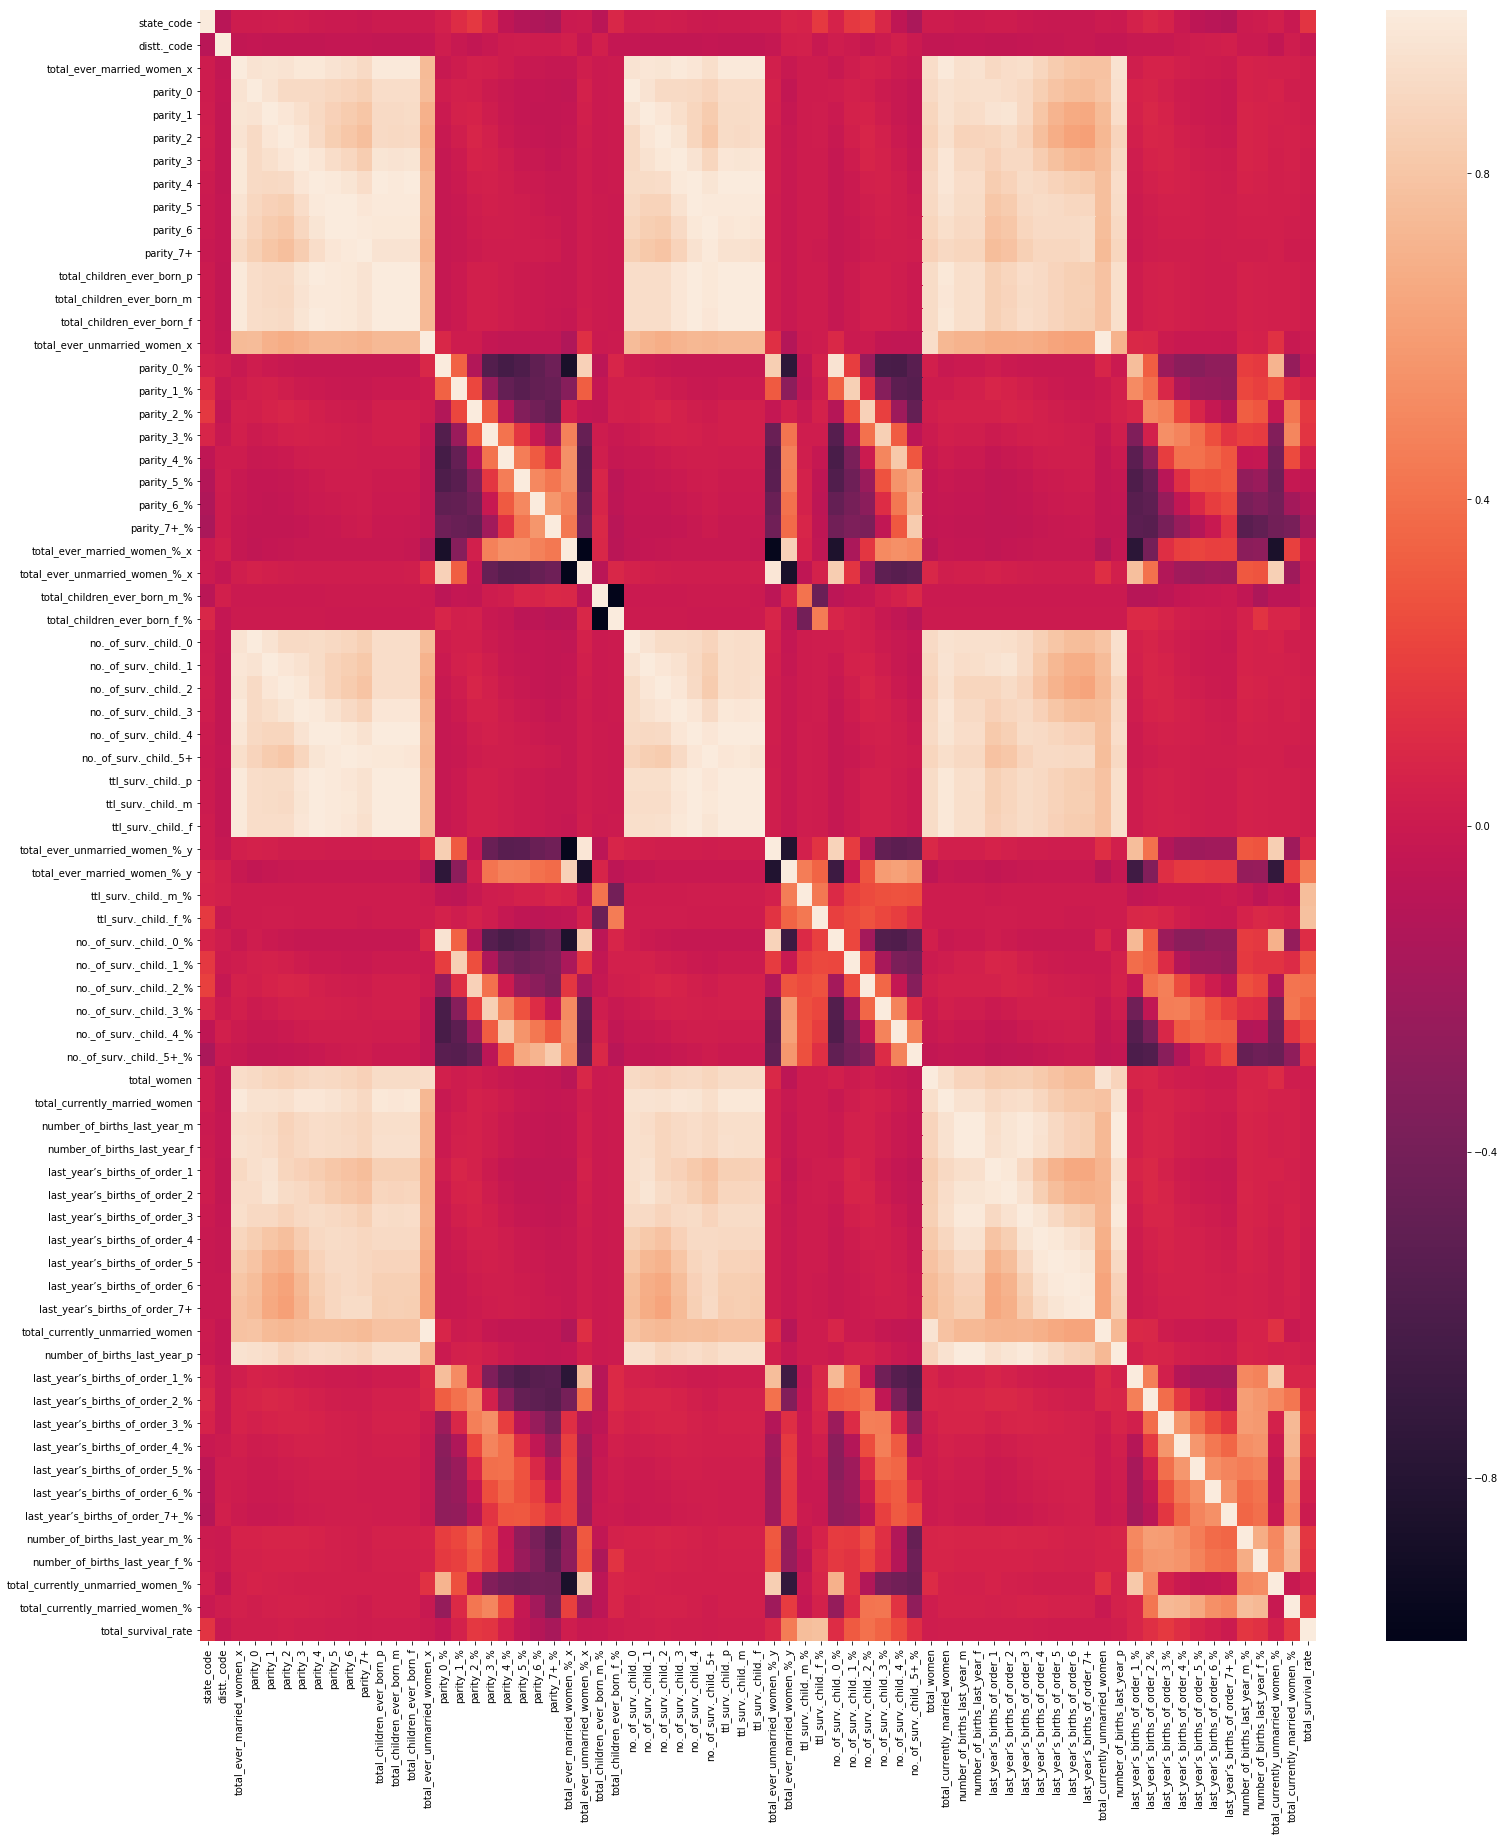

In [173]:
plt.figure(figsize = (25,30))
sns.heatmap(basic.corr())
plt.show()

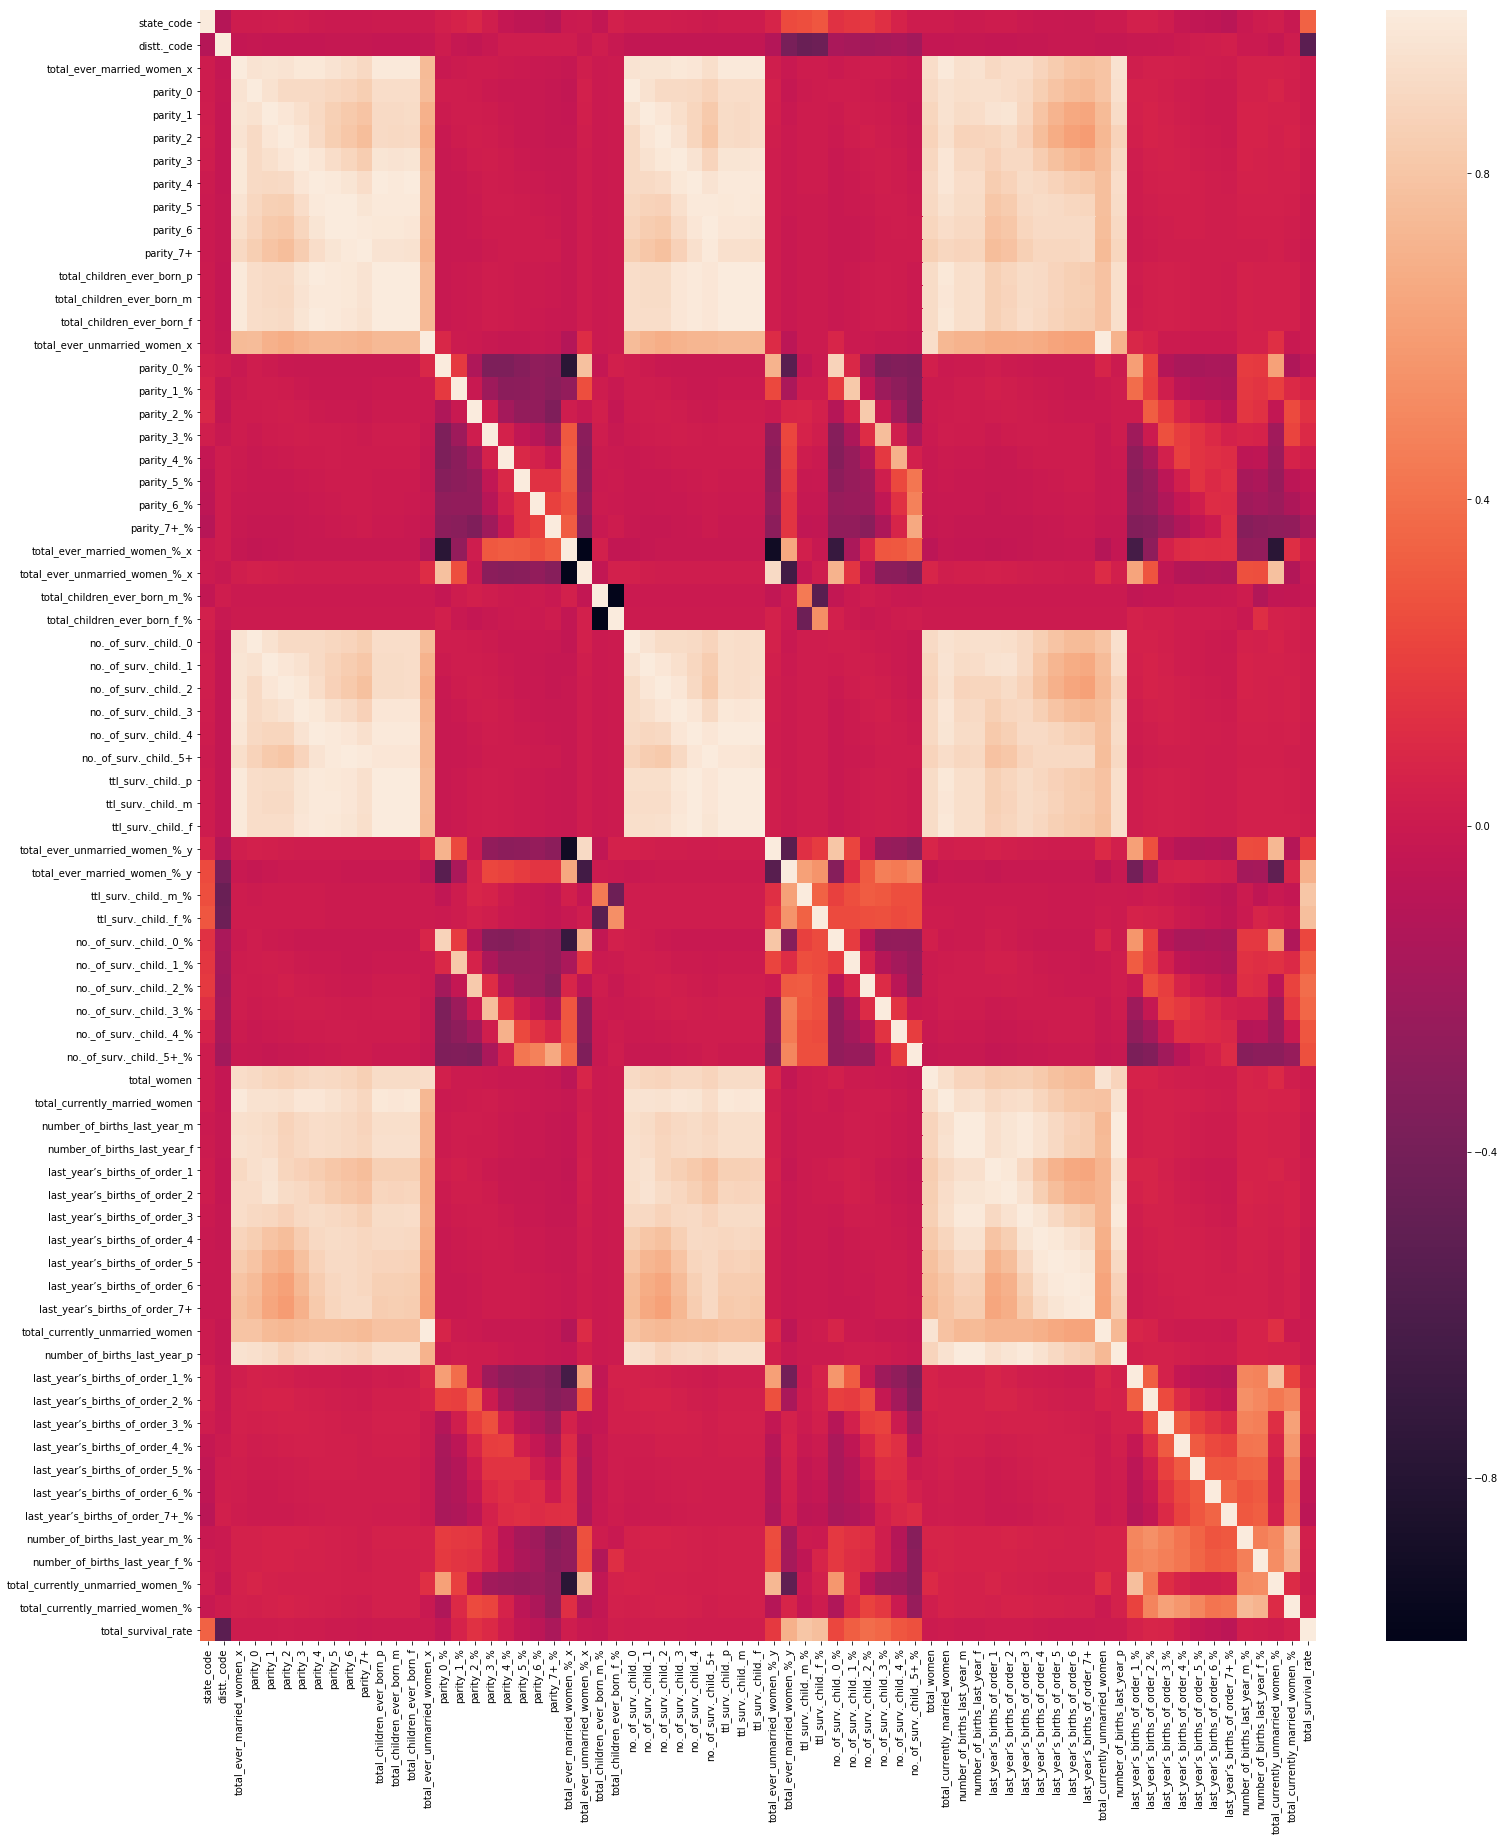

In [179]:
plt.figure(figsize = (25,30))
sns.heatmap(religion.corr())
plt.show()

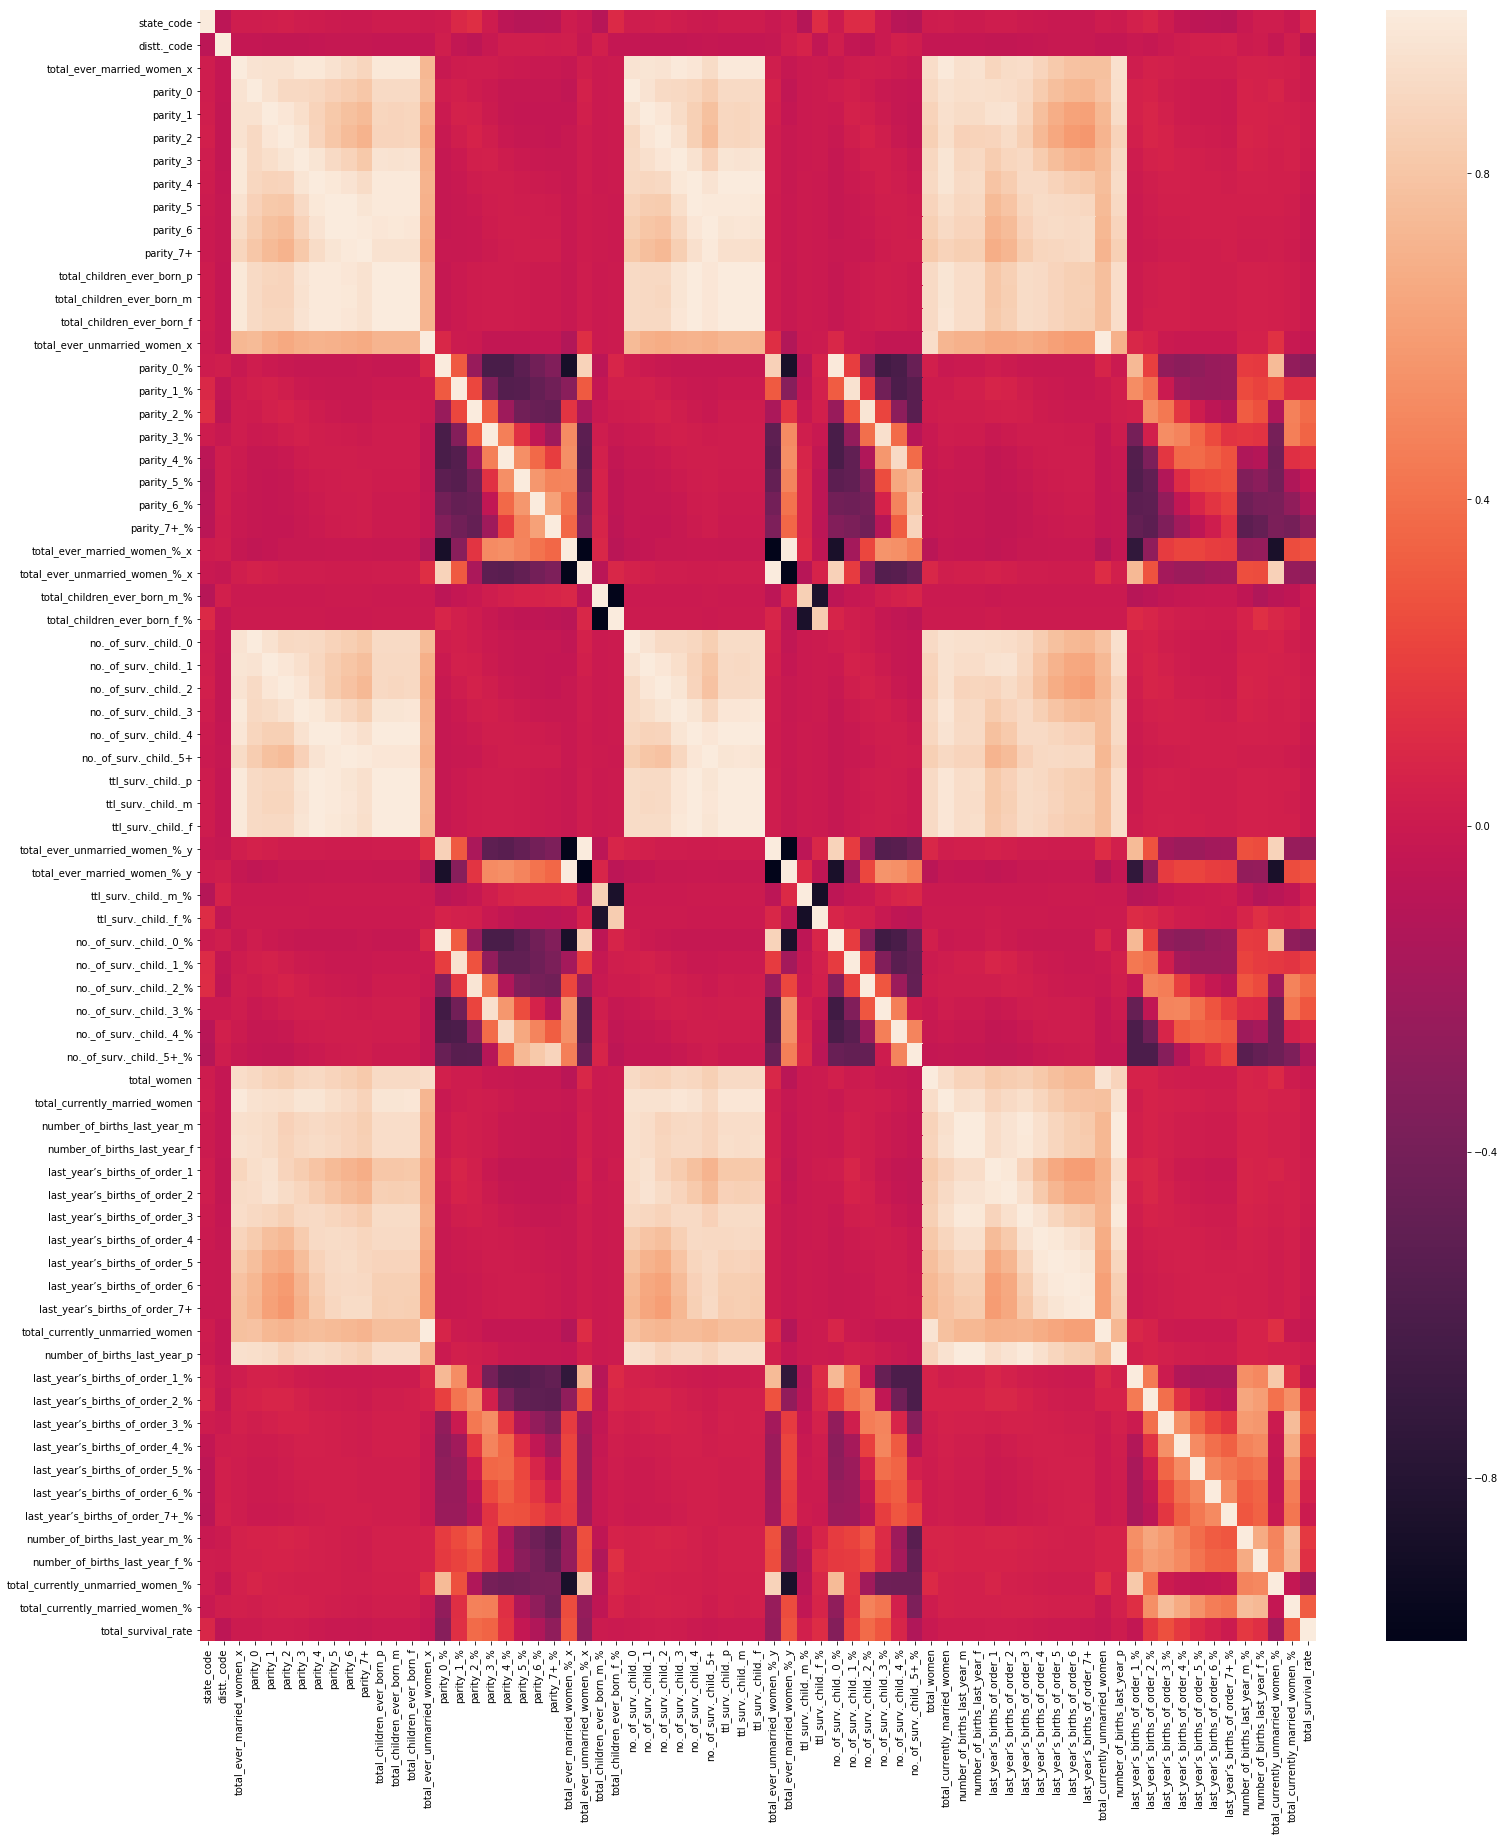

In [180]:
plt.figure(figsize = (25,30))
sns.heatmap(education.corr())
plt.show()

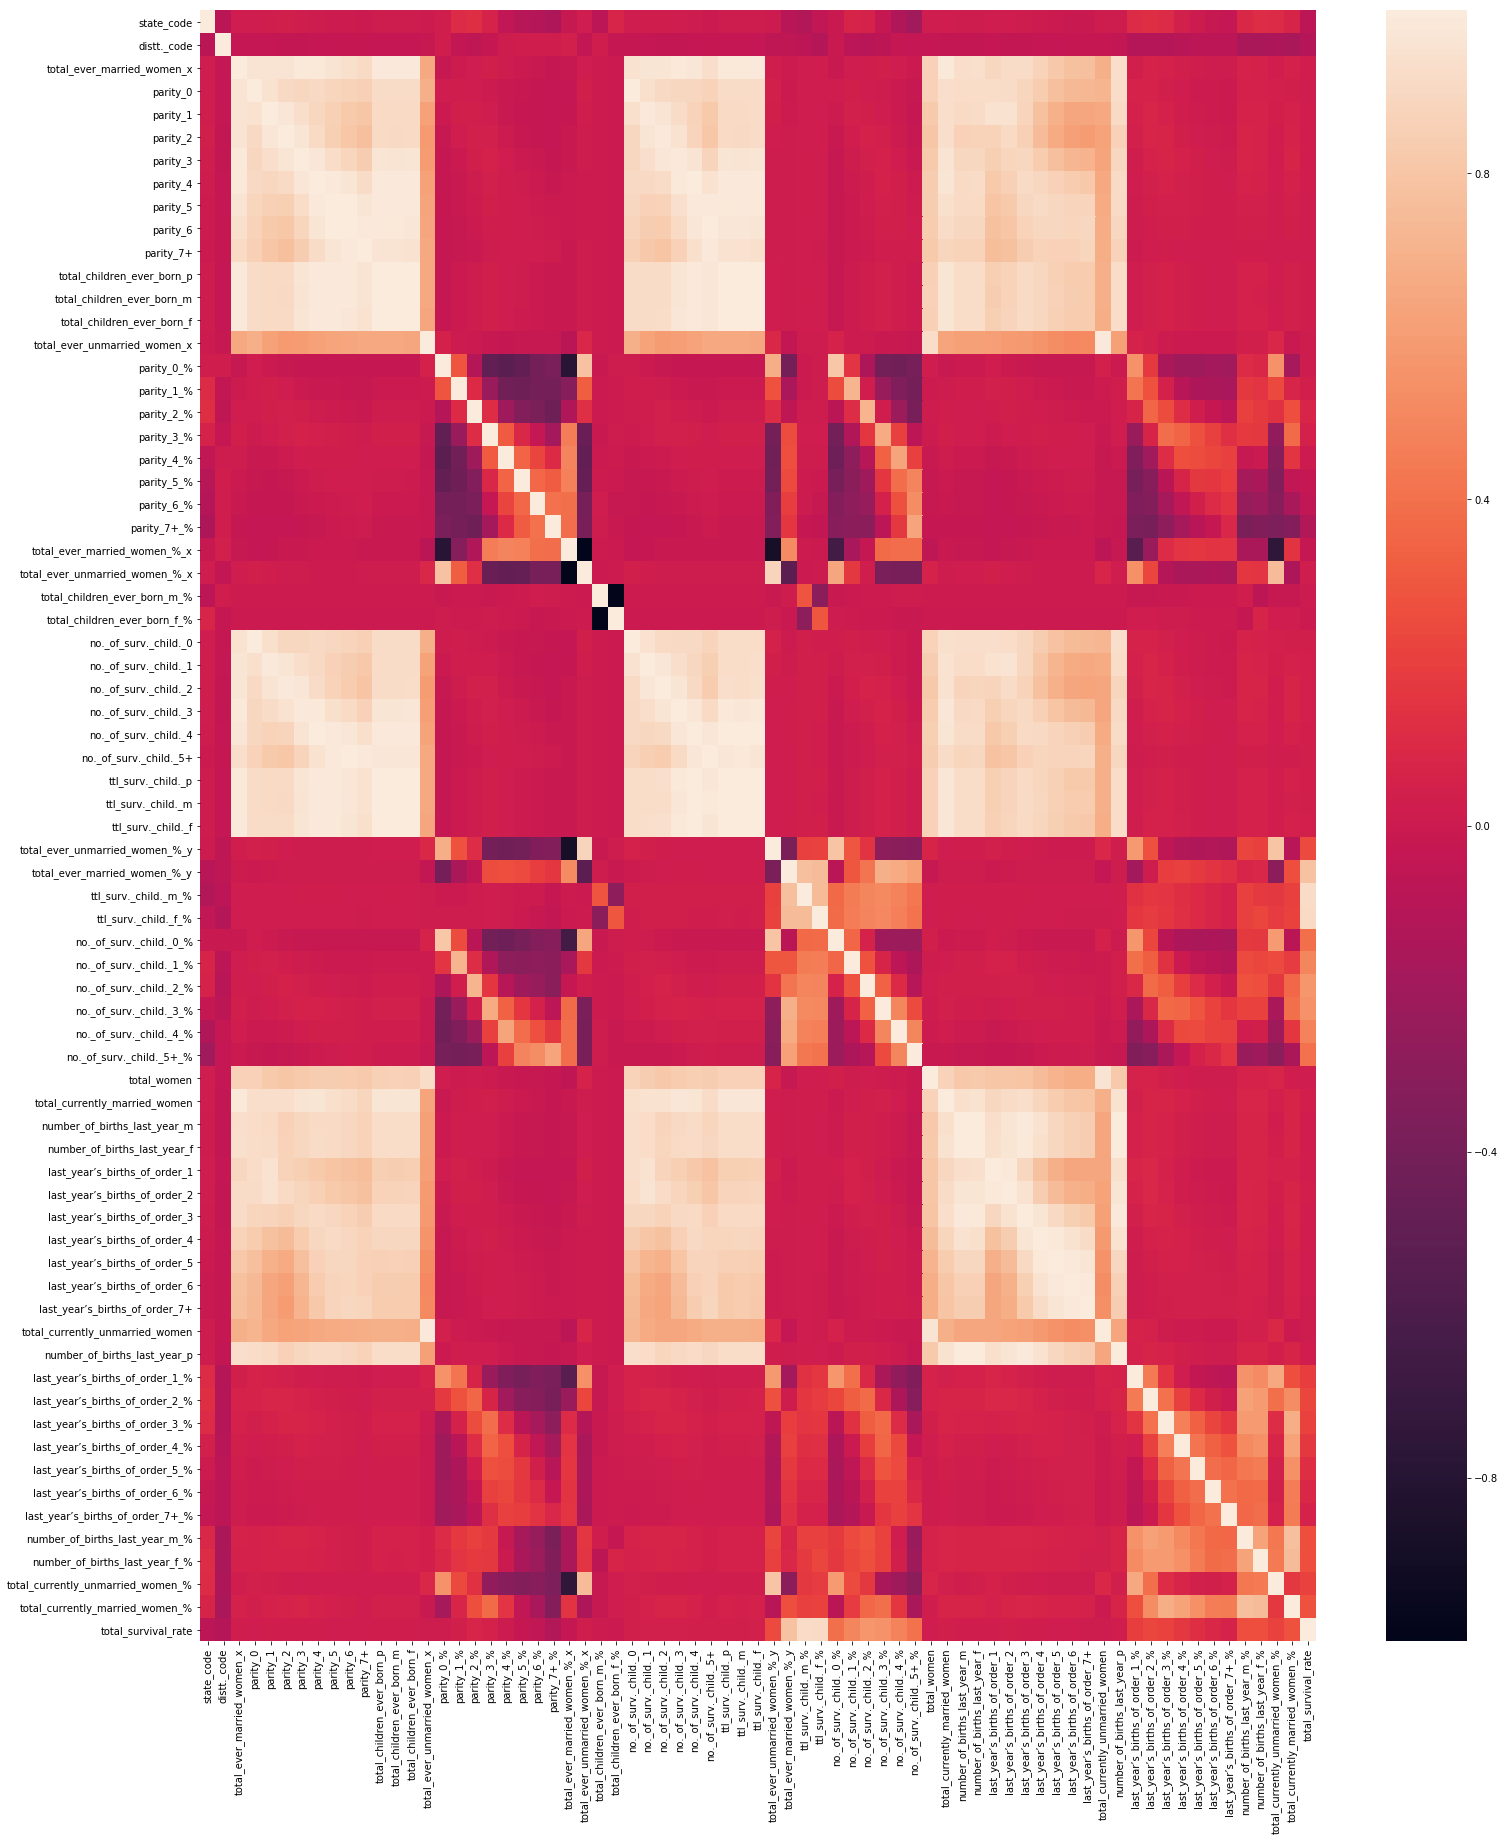

In [181]:
plt.figure(figsize = (25,30))
sns.heatmap(economics.corr())
plt.show()

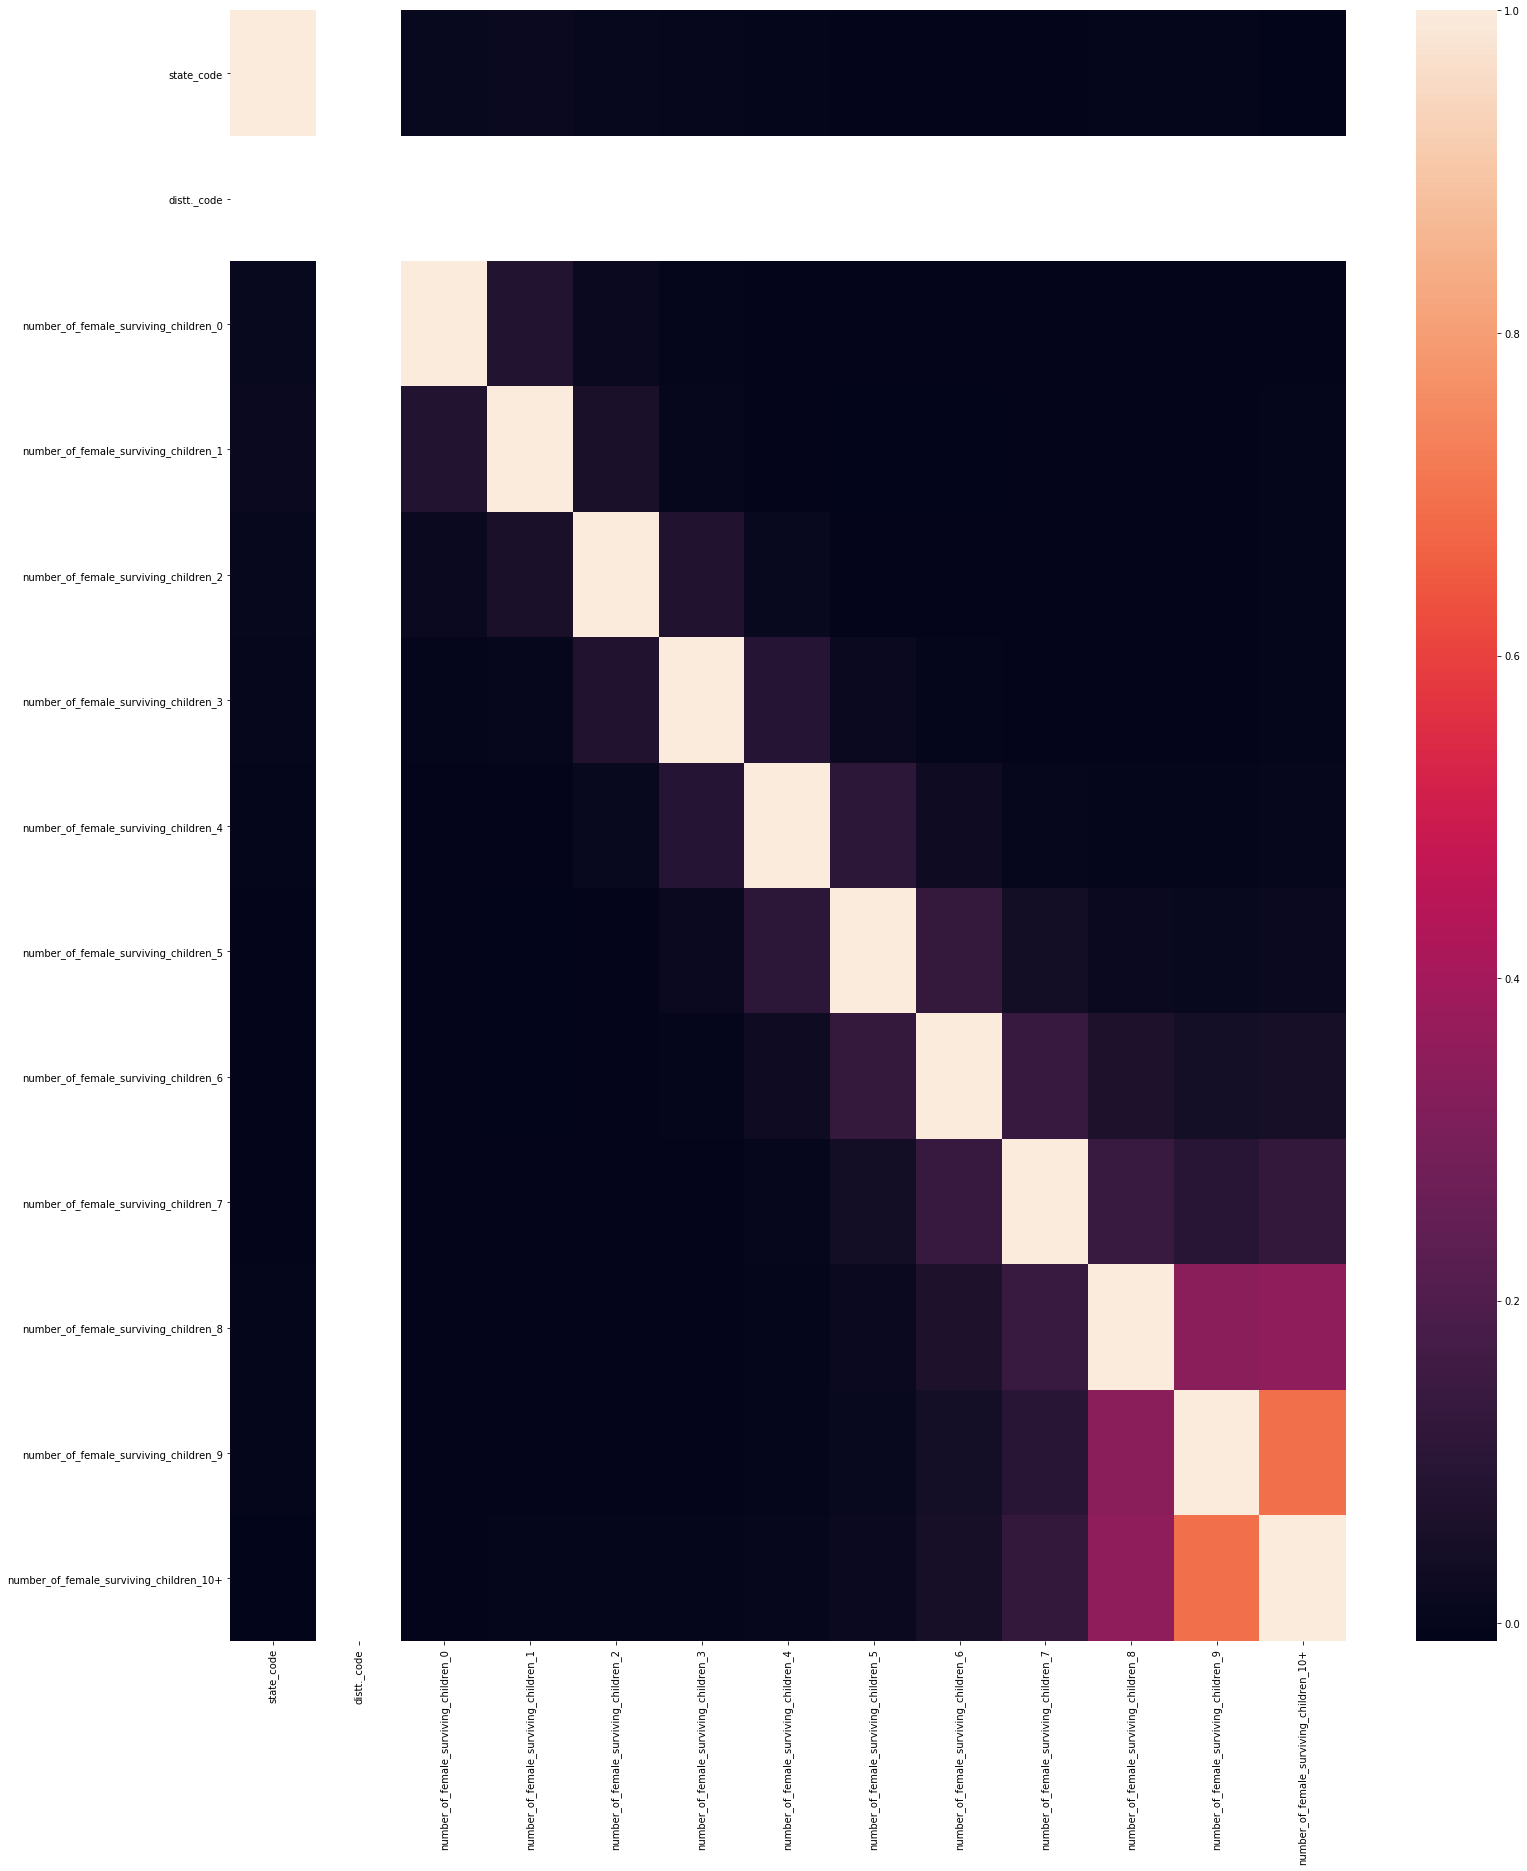

In [182]:
plt.figure(figsize = (25,30))
sns.heatmap(female_survive.corr())
plt.show()

# linear

## basic

In [174]:
print(basic.info())
print(basic.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82745 entries, 0 to 82744
Data columns (total 75 columns):
state_code                           82745 non-null int64
distt._code                          82745 non-null int64
area_name                            82745 non-null object
total/_rural/_urban                  82745 non-null object
present_age                          82745 non-null object
total_ever_married_women_x           82745 non-null int64
parity_0                             82745 non-null int64
parity_1                             82745 non-null int64
parity_2                             82745 non-null int64
parity_3                             82745 non-null int64
parity_4                             82745 non-null int64
parity_5                             82745 non-null int64
parity_6                             82745 non-null int64
parity_7+                            82745 non-null int64
total_children_ever_born_p           82745 non-null int64
total_children_eve

In [175]:
# Seperating into categortical and numric
categorical = basic.select_dtypes(include=['object'])
numeric = basic.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['area_name' 'total/_rural/_urban' 'present_age' 'all/sc/st']
['state_code' 'distt._code' 'total_ever_married_women_x' 'parity_0'
 'parity_1' 'parity_2' 'parity_3' 'parity_4' 'parity_5' 'parity_6'
 'parity_7+' 'total_children_ever_born_p' 'total_children_ever_born_m'
 'total_children_ever_born_f' 'total_ever_unmarried_women_x' 'parity_0_%'
 'parity_1_%' 'parity_2_%' 'parity_3_%' 'parity_4_%' 'parity_5_%'
 'parity_6_%' 'parity_7+_%' 'total_ever_married_women_%_x'
 'total_ever_unmarried_women_%_x' 'total_children_ever_born_m_%'
 'total_children_ever_born_f_%' 'no._of_surv._child._0'
 'no._of_surv._child._1' 'no._of_surv._child._2' 'no._of_surv._child._3'
 'no._of_surv._child._4' 'no._of_surv._child._5+' 'ttl_surv._child._p'
 'ttl_surv._child._m' 'ttl_surv._child._f'
 'total_ever_unmarried_women_%_y' 'total_ever_married_women_%_y'
 'ttl_surv._child._m_%' 'ttl_surv._child._f_%' 'no._of_surv._child._0_%'
 'no._of_surv._child._1_%' 'no._of_surv._child._2_%'
 'no._of_surv._child._3_%' 'no._of

In [176]:
# Creating dummies
category = ['area_name','total/_rural/_urban', 'present_age' ,'all/sc/st']
dummy = pd.get_dummies(basic[category])
basic_1 = pd.concat([basic, dummy], axis=1)
basic_1 = basic_1.drop(category, axis=1)

In [177]:
# Converting everything into float for model building
basic_1 = basic_1.astype('float')
basic_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82745 entries, 0 to 82744
Columns: 713 entries, state_code to all/sc/st_st
dtypes: float64(713)
memory usage: 450.7 MB


In [178]:
from sklearn.model_selection import train_test_split

In [179]:
# Putting feature variable to X
X = basic_1.drop(['total_survival_rate'], axis=1)
X.head()

,state_code,distt._code,total_ever_married_women_x,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,...,present_age_60-64,present_age_65-69,present_age_70-74,present_age_75-79,present_age_80+,present_age_all_ages,present_age_less_than_15,all/sc/st_all,all/sc/st_sc,all/sc/st_st
0,18.0,0.0,6314946.0,931210.0,887716.0,1057759.0,985536.0,801672.0,573579.0,398629.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,18.0,0.0,26743.0,19698.0,3631.0,3414.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,18.0,0.0,255701.0,168781.0,65091.0,14673.0,3410.0,3746.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,18.0,0.0,738470.0,226672.0,261305.0,161846.0,58196.0,18418.0,5532.0,2089.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18.0,0.0,1024901.0,150400.0,211458.0,276890.0,203180.0,107028.0,44505.0,16809.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [180]:
# Putting response variable to y
y = basic_1['total_survival_rate']
y.head()

0    0.873233
1    0.746247
2    0.882609
3    0.902914
4    0.906400
Name: total_survival_rate, dtype: float64

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
df_train, df_test = train_test_split(basic_1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [184]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['total_ever_married_women_x', 'parity_0', 'parity_1', 'parity_2',  'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+','total_children_ever_born_p', 'total_children_ever_born_m', 'total_children_ever_born_f',  'total_ever_unmarried_women_x', 'parity_0_%', 'parity_1_%',  'parity_2_%', 'parity_3_%', 'parity_4_%', 'parity_5_%', 'parity_6_%', 'parity_7+_%', 'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x', 'total_children_ever_born_m_%','total_children_ever_born_f_%', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2', 'no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m','ttl_surv._child._f', 'total_ever_unmarried_women_%_y','total_ever_married_women_%_y', 'ttl_surv._child._m_%','ttl_surv._child._f_%', 'no._of_surv._child._0_%','no._of_surv._child._1_%', 'no._of_surv._child._2_%','no._of_surv._child._3_%', 'no._of_surv._child._4_%','no._of_surv._child._5+_%', 'total_women','total_currently_married_women', 'number_of_births_last_year_m','number_of_births_last_year_f', 'last_year’s_births_of_order_1','last_year’s_births_of_order_2', 'last_year’s_births_of_order_3','last_year’s_births_of_order_4', 'last_year’s_births_of_order_5','last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+','total_currently_unmarried_women', 'number_of_births_last_year_p','last_year’s_births_of_order_1_%', 'last_year’s_births_of_order_2_%', 'last_year’s_births_of_order_3_%', 'last_year’s_births_of_order_4_%','last_year’s_births_of_order_5_%', 'last_year’s_births_of_order_6_%','last_year’s_births_of_order_7+_%', 'number_of_births_last_year_m_%','number_of_births_last_year_f_%', 'total_currently_unmarried_women_%','total_currently_married_women_%', 'total_survival_rate']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train

,state_code,distt._code,total_ever_married_women_x,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,...,present_age_60-64,present_age_65-69,present_age_70-74,present_age_75-79,present_age_80+,present_age_all_ages,present_age_less_than_15,all/sc/st_all,all/sc/st_sc,all/sc/st_st
17248,21.0,29.0,1.017653e-03,1.912257e-03,3.230949e-03,1.642950e-03,6.259576e-04,1.803258e-04,6.471358e-05,2.819997e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29339,19.0,8.0,7.793066e-05,3.548147e-04,7.913583e-05,7.606252e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
56738,9.0,64.0,4.112329e-04,1.851175e-03,6.354349e-04,1.394181e-04,4.373200e-05,7.637540e-05,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74813,33.0,18.0,3.484603e-07,4.491326e-07,2.348244e-07,1.789706e-07,8.676984e-07,1.814143e-07,2.319483e-07,6.482751e-07,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
64884,23.0,33.0,3.902755e-05,2.589998e-05,5.072207e-05,4.026839e-05,4.737633e-05,4.480932e-05,4.221460e-05,3.306203e-05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
80494,21.0,30.0,1.712931e-04,1.235115e-04,1.787014e-04,2.088587e-04,2.278576e-04,2.193298e-04,1.885740e-04,1.435929e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16476,21.0,12.0,6.730262e-05,7.081324e-05,8.312784e-05,6.442943e-05,5.969765e-05,6.240650e-05,6.146631e-05,6.320682e-05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12962,23.0,39.0,8.883249e-04,2.810073e-04,4.417047e-04,1.091721e-03,1.818002e-03,1.447323e-03,9.294170e-04,5.776131e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36698,28.0,18.0,2.168668e-04,1.312964e-04,1.547493e-04,1.770020e-04,2.197012e-04,2.608737e-04,2.762505e-04,3.072824e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69936,28.0,13.0,2.640831e-05,2.290576e-05,3.616296e-05,7.194619e-05,4.407908e-05,1.233617e-05,5.566760e-06,3.241376e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
y_train = df_train.pop('total_survival_rate')
X_train = df_train

In [186]:
y_train = y_train.to_frame()
y_train

,total_survival_rate
17248,0.861477
29339,0.882898
56738,0.862023
74813,0.708333
64884,0.855566
80494,0.833638
16476,0.842008
12962,0.847967
36698,0.875678
69936,0.934933


In [187]:
X_train 

,state_code,distt._code,total_ever_married_women_x,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,...,present_age_60-64,present_age_65-69,present_age_70-74,present_age_75-79,present_age_80+,present_age_all_ages,present_age_less_than_15,all/sc/st_all,all/sc/st_sc,all/sc/st_st
17248,21.0,29.0,1.017653e-03,1.912257e-03,3.230949e-03,1.642950e-03,6.259576e-04,1.803258e-04,6.471358e-05,2.819997e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29339,19.0,8.0,7.793066e-05,3.548147e-04,7.913583e-05,7.606252e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
56738,9.0,64.0,4.112329e-04,1.851175e-03,6.354349e-04,1.394181e-04,4.373200e-05,7.637540e-05,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74813,33.0,18.0,3.484603e-07,4.491326e-07,2.348244e-07,1.789706e-07,8.676984e-07,1.814143e-07,2.319483e-07,6.482751e-07,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
64884,23.0,33.0,3.902755e-05,2.589998e-05,5.072207e-05,4.026839e-05,4.737633e-05,4.480932e-05,4.221460e-05,3.306203e-05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
80494,21.0,30.0,1.712931e-04,1.235115e-04,1.787014e-04,2.088587e-04,2.278576e-04,2.193298e-04,1.885740e-04,1.435929e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16476,21.0,12.0,6.730262e-05,7.081324e-05,8.312784e-05,6.442943e-05,5.969765e-05,6.240650e-05,6.146631e-05,6.320682e-05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12962,23.0,39.0,8.883249e-04,2.810073e-04,4.417047e-04,1.091721e-03,1.818002e-03,1.447323e-03,9.294170e-04,5.776131e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36698,28.0,18.0,2.168668e-04,1.312964e-04,1.547493e-04,1.770020e-04,2.197012e-04,2.608737e-04,2.762505e-04,3.072824e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69936,28.0,13.0,2.640831e-05,2.290576e-05,3.616296e-05,7.194619e-05,4.407908e-05,1.233617e-05,5.566760e-06,3.241376e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [202]:
X_train.columns[~rfe.support_]

Index(['state_code', 'distt._code', 'total_ever_married_women_x', 'parity_0',
       'parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6',
       ...
       'present_age_60-64', 'present_age_65-69', 'present_age_70-74',
       'present_age_75-79', 'present_age_80+', 'present_age_all_ages',
       'present_age_less_than_15', 'all/sc/st_all', 'all/sc/st_sc',
       'all/sc/st_st'],
      dtype='object', length=697)

In [203]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [204]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [205]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [206]:
lm.params

const                             0.127406
total_children_ever_born_p       -5.067247
total_children_ever_born_m       -8.224579
total_children_ever_born_f       -1.471661
parity_5_%                       -0.238758
parity_6_%                       -0.391316
parity_7+_%                      -0.652371
ttl_surv._child._p                4.797142
ttl_surv._child._m                6.969692
ttl_surv._child._f                2.219119
ttl_surv._child._m_%              0.744752
ttl_surv._child._f_%              0.765514
no._of_surv._child._5+_%          0.498697
last_year’s_births_of_order_4     1.559996
last_year’s_births_of_order_5    -2.063891
last_year’s_births_of_order_7+    1.239683
dtype: float64

In [207]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 3.260e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:32:24   Log-Likelihood:                 79587.
No. Observations:                57921   AIC:                        -1.591e+05
Df Residuals:                    57907   BIC:                        -1.590e+05
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1274      0.002     75.335      0.000       0.124       0.131
total_children_ever_born_p        -5.0672      1.132     -4.477      0.000      -7.285      -2.849
total_children_ever_born_m        -8.2246     12.133     -0.678      0.498     -32.004      15.555
total_children_ever_born_f        -1.4717     11.585     -0.127      0.899     -24.178      21.235
parity_5_%                        -0.2388      0.005    -45.110      0.000      -0.249      -0.228
parity_6_%                        -0.3913      0.006    -63.972      0.000      -0.403      -0.379
parity_7+_%                       -0.6524      0.004   -147.176      0.000      -0.661      -0.644
ttl_surv._child._p                 4.7971      1.144      4.194      0.000       2.555       7.039
ttl_surv._child._m                 6.9697      8.903      0.783      0.434     -10.481      24.421
ttl_surv._child._f                 2.2191      8.222      0.270      0.787     -13.897      18.335
ttl_surv._child._m_%               0.7448      0.003    281.696      0.000       0.740       0.750
ttl_surv._child._f_%               0.7655      0.003    268.551      0.000       0.760       0.771
no._of_surv._child._5+_%           0.4987      0.005    107.525      0.000       0.490       0.508
last_year’s_births_of_order_4      1.5600      0.306      5.095      0.000       0.960       2.160
last_year’s_births_of_order_5     -2.0639      0.422     -4.894      0.000      -2.890      -1.237
last_year’s_births_of_order_7+     1.2397      0.280      4.429      0.000       0.691       1.788
==============================================================================
Omnibus:                    30730.535   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643214.547
Skew:                          -2.101   Prob(JB):                         0.00
Kurtosis:                      18.776   Cond. No.                     2.68e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [208]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,total_children_ever_born_p,inf
2,total_children_ever_born_m,inf
3,total_children_ever_born_f,inf
7,ttl_surv._child._p,inf
8,ttl_surv._child._m,inf
9,ttl_surv._child._f,inf
14,last_year’s_births_of_order_5,155.690000
13,last_year’s_births_of_order_4,88.420000
15,last_year’s_births_of_order_7+,59.210000
12,no._of_surv._child._5+_%,9.760000


In [209]:
X_train_new = X_train_rfe.drop(["total_children_ever_born_p"], axis = 1)

In [210]:
# Adding a constant variable 
X_train_new_1 = sm.add_constant(X_train_new)

In [211]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_new_1).fit()   

In [212]:
lm_1.params

const                              0.127406
total_children_ever_born_m       -10.922630
total_children_ever_born_f        -3.840856
parity_5_%                        -0.238758
parity_6_%                        -0.391316
parity_7+_%                       -0.652371
ttl_surv._child._p                 4.797142
ttl_surv._child._m                 6.969692
ttl_surv._child._f                 2.219119
ttl_surv._child._m_%               0.744752
ttl_surv._child._f_%               0.765514
no._of_surv._child._5+_%           0.498697
last_year’s_births_of_order_4      1.559996
last_year’s_births_of_order_5     -2.063891
last_year’s_births_of_order_7+     1.239683
dtype: float64

In [213]:
#Let's see the summary of our linear model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 3.260e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:32:26   Log-Likelihood:                 79587.
No. Observations:                57921   AIC:                        -1.591e+05
Df Residuals:                    57907   BIC:                        -1.590e+05
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1274      0.002     75.335      0.000       0.124       0.131
total_children_ever_born_m       -10.9226     12.698     -0.860      0.390     -35.810      13.965
total_children_ever_born_f        -3.8409     11.108     -0.346      0.730     -25.612      17.930
parity_5_%                        -0.2388      0.005    -45.110      0.000      -0.249      -0.228
parity_6_%                        -0.3913      0.006    -63.972      0.000      -0.403      -0.379
parity_7+_%                       -0.6524      0.004   -147.176      0.000      -0.661      -0.644
ttl_surv._child._p                 4.7971      1.144      4.194      0.000       2.555       7.039
ttl_surv._child._m                 6.9697      8.903      0.783      0.434     -10.481      24.421
ttl_surv._child._f                 2.2191      8.222      0.270      0.787     -13.897      18.335
ttl_surv._child._m_%               0.7448      0.003    281.696      0.000       0.740       0.750
ttl_surv._child._f_%               0.7655      0.003    268.551      0.000       0.760       0.771
no._of_surv._child._5+_%           0.4987      0.005    107.525      0.000       0.490       0.508
last_year’s_births_of_order_4      1.5600      0.306      5.095      0.000       0.960       2.160
last_year’s_births_of_order_5     -2.0639      0.422     -4.894      0.000      -2.890      -1.237
last_year’s_births_of_order_7+     1.2397      0.280      4.429      0.000       0.691       1.788
==============================================================================
Omnibus:                    30730.535   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643214.547
Skew:                          -2.101   Prob(JB):                         0.00
Kurtosis:                      18.776   Cond. No.                     8.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [214]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,ttl_surv._child._p,inf
7,ttl_surv._child._m,inf
8,ttl_surv._child._f,inf
1,total_children_ever_born_m,1.633364e+05
2,total_children_ever_born_f,1.294774e+05
13,last_year’s_births_of_order_5,1.556900e+02
12,last_year’s_births_of_order_4,8.842000e+01
14,last_year’s_births_of_order_7+,5.921000e+01
0,const,4.417000e+01
11,no._of_surv._child._5+_%,9.760000e+00


In [215]:
X_train_new_1 = X_train_new_1.drop(["ttl_surv._child._p"], axis = 1)

In [216]:
# Adding a constant variable  
X_train_new_1 = sm.add_constant(X_train_new_1)

In [217]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_new_1).fit()   

In [218]:
lm_2.params

const                              0.127406
total_children_ever_born_m       -10.922630
total_children_ever_born_f        -3.840856
parity_5_%                        -0.238758
parity_6_%                        -0.391316
parity_7+_%                       -0.652371
ttl_surv._child._m                 9.572987
ttl_surv._child._f                 4.412967
ttl_surv._child._m_%               0.744752
ttl_surv._child._f_%               0.765514
no._of_surv._child._5+_%           0.498697
last_year’s_births_of_order_4      1.559996
last_year’s_births_of_order_5     -2.063891
last_year’s_births_of_order_7+     1.239683
dtype: float64

In [219]:
#Let's see the summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 3.260e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:33:19   Log-Likelihood:                 79587.
No. Observations:                57921   AIC:                        -1.591e+05
Df Residuals:                    57907   BIC:                        -1.590e+05
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1274      0.002     75.335      0.000       0.124       0.131
total_children_ever_born_m       -10.9226     12.698     -0.860      0.390     -35.810      13.965
total_children_ever_born_f        -3.8409     11.108     -0.346      0.730     -25.612      17.930
parity_5_%                        -0.2388      0.005    -45.110      0.000      -0.249      -0.228
parity_6_%                        -0.3913      0.006    -63.972      0.000      -0.403      -0.379
parity_7+_%                       -0.6524      0.004   -147.176      0.000      -0.661      -0.644
ttl_surv._child._m                 9.5730      9.496      1.008      0.313      -9.039      28.185
ttl_surv._child._f                 4.4130      7.745      0.570      0.569     -10.767      19.593
ttl_surv._child._m_%               0.7448      0.003    281.696      0.000       0.740       0.750
ttl_surv._child._f_%               0.7655      0.003    268.551      0.000       0.760       0.771
no._of_surv._child._5+_%           0.4987      0.005    107.525      0.000       0.490       0.508
last_year’s_births_of_order_4      1.5600      0.306      5.095      0.000       0.960       2.160
last_year’s_births_of_order_5     -2.0639      0.422     -4.894      0.000      -2.890      -1.237
last_year’s_births_of_order_7+     1.2397      0.280      4.429      0.000       0.691       1.788
==============================================================================
Omnibus:                    30730.535   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643214.547
Skew:                          -2.101   Prob(JB):                         0.00
Kurtosis:                      18.776   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,total_children_ever_born_m,163336.35
2,total_children_ever_born_f,129477.42
6,ttl_surv._child._m,94157.67
7,ttl_surv._child._f,66923.13
12,last_year’s_births_of_order_5,155.69
11,last_year’s_births_of_order_4,88.42
13,last_year’s_births_of_order_7+,59.21
0,const,44.17
10,no._of_surv._child._5+_%,9.76
5,parity_7+_%,4.70


In [221]:
X_train_new_2 = X_train_new_1.drop(["total_children_ever_born_m"], axis = 1)

In [222]:
# Adding a constant variable  
X_train_new_2 = sm.add_constant(X_train_new_2)

In [223]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_new_2).fit()   

In [224]:
lm_3.params

const                              0.127275
total_children_ever_born_f       -13.336654
parity_5_%                        -0.238836
parity_6_%                        -0.391386
parity_7+_%                       -0.652410
ttl_surv._child._m                 1.459204
ttl_surv._child._f                10.993463
ttl_surv._child._m_%               0.744886
ttl_surv._child._f_%               0.765657
no._of_surv._child._5+_%           0.498725
last_year’s_births_of_order_4      1.557925
last_year’s_births_of_order_5     -2.051773
last_year’s_births_of_order_7+     1.334628
dtype: float64

In [225]:
#Let's see the summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 3.532e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:33:41   Log-Likelihood:                 79587.
No. Observations:                57921   AIC:                        -1.591e+05
Df Residuals:                    57908   BIC:                        -1.590e+05
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1273      0.002     75.566      0.000       0.124       0.131
total_children_ever_born_f       -13.3367      1.231    -10.836      0.000     -15.749     -10.924
parity_5_%                        -0.2388      0.005    -45.131      0.000      -0.249      -0.228
parity_6_%                        -0.3914      0.006    -63.990      0.000      -0.403      -0.379
parity_7+_%                       -0.6524      0.004   -147.194      0.000      -0.661      -0.644
ttl_surv._child._m                 1.4592      1.095      1.332      0.183      -0.687       3.606
ttl_surv._child._f                10.9935      1.208      9.101      0.000       8.626      13.361
ttl_surv._child._m_%               0.7449      0.003    282.237      0.000       0.740       0.750
ttl_surv._child._f_%               0.7657      0.003    269.060      0.000       0.760       0.771
no._of_surv._child._5+_%           0.4987      0.005    107.534      0.000       0.490       0.508
last_year’s_births_of_order_4      1.5579      0.306      5.088      0.000       0.958       2.158
last_year’s_births_of_order_5     -2.0518      0.421     -4.868      0.000      -2.878      -1.226
last_year’s_births_of_order_7+     1.3346      0.257      5.189      0.000       0.831       1.839
==============================================================================
Omnibus:                    30725.794   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643372.863
Skew:                          -2.100   Prob(JB):                         0.00
Kurtosis:                      18.778   Cond. No.                     7.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,ttl_surv._child._f,1628.01
1,total_children_ever_born_f,1589.83
5,ttl_surv._child._m,1252.50
11,last_year’s_births_of_order_5,155.52
10,last_year’s_births_of_order_4,88.42
12,last_year’s_births_of_order_7+,50.00
0,const,43.81
9,no._of_surv._child._5+_%,9.76
4,parity_7+_%,4.70
3,parity_6_%,2.27


In [227]:
X_train_new_3 = X_train_new_2.drop(["ttl_surv._child._f"], axis = 1)

In [228]:
# Adding a constant variable  
X_train_new_3 = sm.add_constant(X_train_new_3)

In [229]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_new_3).fit()

In [230]:
lm_4.params

const                             0.126850
total_children_ever_born_f       -6.362144
parity_5_%                       -0.239192
parity_6_%                       -0.392084
parity_7+_%                      -0.653797
ttl_surv._child._m                6.402418
ttl_surv._child._m_%              0.745092
ttl_surv._child._f_%              0.766701
no._of_surv._child._5+_%          0.499301
last_year’s_births_of_order_4     1.282608
last_year’s_births_of_order_5    -1.267219
last_year’s_births_of_order_7+    0.010675
dtype: float64

In [231]:
#Let's see the summary of our linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 3.847e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:33:57   Log-Likelihood:                 79545.
No. Observations:                57921   AIC:                        -1.591e+05
Df Residuals:                    57909   BIC:                        -1.590e+05
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1268      0.002     75.289      0.000       0.124       0.130
total_children_ever_born_f        -6.3621      0.964     -6.601      0.000      -8.251      -4.473
parity_5_%                        -0.2392      0.005    -45.168      0.000      -0.250      -0.229
parity_6_%                        -0.3921      0.006    -64.064      0.000      -0.404      -0.380
parity_7+_%                       -0.6538      0.004   -147.490      0.000      -0.662      -0.645
ttl_surv._child._m                 6.4024      0.952      6.727      0.000       4.537       8.268
ttl_surv._child._m_%               0.7451      0.003    282.126      0.000       0.740       0.750
ttl_surv._child._f_%               0.7667      0.003    269.456      0.000       0.761       0.772
no._of_surv._child._5+_%           0.4993      0.005    107.592      0.000       0.490       0.508
last_year’s_births_of_order_4      1.2826      0.305      4.207      0.000       0.685       1.880
last_year’s_births_of_order_5     -1.2672      0.413     -3.070      0.002      -2.076      -0.458
last_year’s_births_of_order_7+     0.0107      0.212      0.050      0.960      -0.405       0.427
==============================================================================
Omnibus:                    30660.278   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           642108.344
Skew:                          -2.094   Prob(JB):                         0.00
Kurtosis:                      18.765   Cond. No.                     6.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,total_children_ever_born_f,973.49
5,ttl_surv._child._m,944.43
10,last_year’s_births_of_order_5,149.01
9,last_year’s_births_of_order_4,87.55
0,const,43.77
11,last_year’s_births_of_order_7+,34.01
8,no._of_surv._child._5+_%,9.76
4,parity_7+_%,4.69
3,parity_6_%,2.27
2,parity_5_%,2.24


In [233]:
X_train_new_4 = X_train_new_3.drop(["total_children_ever_born_f"], axis = 1)

In [234]:
# Adding a constant variable  
X_train_new_4 = sm.add_constant(X_train_new_4)

In [235]:
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_new_4).fit()

In [236]:
#Let's see the summary of our linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 4.228e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:34:14   Log-Likelihood:                 79523.
No. Observations:                57921   AIC:                        -1.590e+05
Df Residuals:                    57910   BIC:                        -1.589e+05
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1264      0.002     75.070      0.000       0.123       0.130
parity_5_%                        -0.2402      0.005    -45.367      0.000      -0.251      -0.230
parity_6_%                        -0.3929      0.006    -64.186      0.000      -0.405      -0.381
parity_7+_%                       -0.6546      0.004   -147.685      0.000      -0.663      -0.646
ttl_surv._child._m                 0.1493      0.091      1.634      0.102      -0.030       0.328
ttl_surv._child._m_%               0.7458      0.003    282.514      0.000       0.741       0.751
ttl_surv._child._f_%               0.7668      0.003    269.391      0.000       0.761       0.772
no._of_surv._child._5+_%           0.5002      0.005    107.804      0.000       0.491       0.509
last_year’s_births_of_order_4      0.9530      0.301      3.167      0.002       0.363       1.543
last_year’s_births_of_order_5     -0.8465      0.408     -2.075      0.038      -1.646      -0.047
last_year’s_births_of_order_7+    -0.2290      0.209     -1.095      0.274      -0.639       0.181
==============================================================================
Omnibus:                    30582.864   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640577.437
Skew:                          -2.086   Prob(JB):                         0.00
Kurtosis:                      18.748   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [237]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,last_year’s_births_of_order_5,145.46
8,last_year’s_births_of_order_4,85.21
0,const,43.71
10,last_year’s_births_of_order_7+,33.01
7,no._of_surv._child._5+_%,9.75
4,ttl_surv._child._m,8.70
3,parity_7+_%,4.69
2,parity_6_%,2.27
1,parity_5_%,2.23
5,ttl_surv._child._m_%,1.42


In [238]:
X_train_new_5 = X_train_new_4.drop(["last_year’s_births_of_order_5"], axis = 1)

In [239]:
# Adding a constant variable  
X_train_new_5 = sm.add_constant(X_train_new_5)

In [240]:
# Running the linear model
lm_6 = sm.OLS(y_train,X_train_new_5).fit()

In [241]:
#Let's see the summary of our linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.879
Method:                  Least Squares   F-statistic:                 4.697e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:34:29   Log-Likelihood:                 79521.
No. Observations:                57921   AIC:                        -1.590e+05
Df Residuals:                    57911   BIC:                        -1.589e+05
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1265      0.002     75.094      0.000       0.123       0.130
parity_5_%                        -0.2406      0.005    -45.461      0.000      -0.251      -0.230
parity_6_%                        -0.3931      0.006    -64.216      0.000      -0.405      -0.381
parity_7+_%                       -0.6545      0.004   -147.667      0.000      -0.663      -0.646
ttl_surv._child._m                 0.2364      0.081      2.914      0.004       0.077       0.395
ttl_surv._child._m_%               0.7458      0.003    282.507      0.000       0.741       0.751
ttl_surv._child._f_%               0.7668      0.003    269.391      0.000       0.761       0.772
no._of_surv._child._5+_%           0.5002      0.005    107.793      0.000       0.491       0.509
last_year’s_births_of_order_4      0.3805      0.120      3.174      0.002       0.146       0.615
last_year’s_births_of_order_7+    -0.6057      0.104     -5.831      0.000      -0.809      -0.402
==============================================================================
Omnibus:                    30592.316   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640758.050
Skew:                          -2.087   Prob(JB):                         0.00
Kurtosis:                      18.750   Cond. No.                         738.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.71
8,last_year’s_births_of_order_4,13.52
7,no._of_surv._child._5+_%,9.75
9,last_year’s_births_of_order_7+,8.14
4,ttl_surv._child._m,6.86
3,parity_7+_%,4.69
2,parity_6_%,2.27
1,parity_5_%,2.23
5,ttl_surv._child._m_%,1.42
6,ttl_surv._child._f_%,1.41


In [243]:
X_train_new_6 = X_train_new_5.drop(["last_year’s_births_of_order_4"], axis = 1)

In [244]:
# Adding a constant variable  
X_train_new_6 = sm.add_constant(X_train_new_6)

In [245]:
# Running the linear model
lm_7 = sm.OLS(y_train,X_train_new_6).fit()

In [246]:
#Let's see the summary of our linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.879
Model:                             OLS   Adj. R-squared:                  0.879
Method:                  Least Squares   F-statistic:                 5.283e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:34:50   Log-Likelihood:                 79516.
No. Observations:                57921   AIC:                        -1.590e+05
Df Residuals:                    57912   BIC:                        -1.589e+05
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1265      0.002     75.116      0.000       0.123       0.130
parity_5_%                        -0.2406      0.005    -45.464      0.000      -0.251      -0.230
parity_6_%                        -0.3933      0.006    -64.254      0.000      -0.405      -0.381
parity_7+_%                       -0.6545      0.004   -147.655      0.000      -0.663      -0.646
ttl_surv._child._m                 0.3990      0.063      6.340      0.000       0.276       0.522
ttl_surv._child._m_%               0.7458      0.003    282.492      0.000       0.741       0.751
ttl_surv._child._f_%               0.7669      0.003    269.415      0.000       0.761       0.772
no._of_surv._child._5+_%           0.4999      0.005    107.741      0.000       0.491       0.509
last_year’s_births_of_order_7+    -0.3741      0.074     -5.059      0.000      -0.519      -0.229
==============================================================================
Omnibus:                    30610.374   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           641382.995
Skew:                          -2.089   Prob(JB):                         0.00
Kurtosis:                      18.758   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.71
7,no._of_surv._child._5+_%,9.74
3,parity_7+_%,4.69
4,ttl_surv._child._m,4.13
8,last_year’s_births_of_order_7+,4.12
2,parity_6_%,2.27
1,parity_5_%,2.23
5,ttl_surv._child._m_%,1.42
6,ttl_surv._child._f_%,1.41


In [248]:
X_train_new_7 = X_train_new_6.drop(["no._of_surv._child._5+_%"], axis = 1)

In [249]:
# Adding a constant variable  
X_train_new_7 = sm.add_constant(X_train_new_7)

In [250]:
# Running the linear model
lm_8 = sm.OLS(y_train,X_train_new_7).fit()

In [251]:
lm_8.params

const                             0.023997
parity_5_%                        0.106823
parity_6_%                       -0.055000
parity_7+_%                      -0.262388
ttl_surv._child._m                0.414314
ttl_surv._child._m_%              0.846754
ttl_surv._child._f_%              0.874627
last_year’s_births_of_order_7+   -0.391901
dtype: float64

In [252]:
#Let's see the summary of our linear model
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_survival_rate   R-squared:                       0.855
Model:                             OLS   Adj. R-squared:                  0.855
Method:                  Least Squares   F-statistic:                 4.892e+04
Date:                 Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                         10:35:04   Log-Likelihood:                 74225.
No. Observations:                57921   AIC:                        -1.484e+05
Df Residuals:                    57913   BIC:                        -1.484e+05
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0240      0.002     15.759      0.000       0.021       0.027
parity_5_%                         0.1068      0.005     23.231      0.000       0.098       0.116
parity_6_%                        -0.0550      0.006     -9.554      0.000      -0.066      -0.044
parity_7+_%                       -0.2624      0.003    -94.645      0.000      -0.268      -0.257
ttl_surv._child._m                 0.4143      0.069      6.009      0.000       0.279       0.549
ttl_surv._child._m_%               0.8468      0.003    313.109      0.000       0.841       0.852
ttl_surv._child._f_%               0.8746      0.003    299.528      0.000       0.869       0.880
last_year’s_births_of_order_7+    -0.3919      0.081     -4.837      0.000      -0.551      -0.233
==============================================================================
Omnibus:                    29265.577   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           464779.917
Skew:                          -2.054   Prob(JB):                         0.00
Kurtosis:                      16.256   Cond. No.                         452.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.76
4,ttl_surv._child._m,4.13
7,last_year’s_births_of_order_7+,4.12
2,parity_6_%,1.67
3,parity_7+_%,1.53
1,parity_5_%,1.40
5,ttl_surv._child._m_%,1.24
6,ttl_surv._child._f_%,1.24


In [254]:
vif['Features'].unique()

array(['const', 'ttl_surv._child._m', 'last_year’s_births_of_order_7+',
       'parity_6_%', 'parity_7+_%', 'parity_5_%', 'ttl_surv._child._m_%',
       'ttl_surv._child._f_%'], dtype=object)

In [256]:
y_train_price = lm_8.predict(X_train_new_7)

In [257]:
y_train

,total_survival_rate
17248,0.861477
29339,0.882898
56738,0.862023
74813,0.708333
64884,0.855566
80494,0.833638
16476,0.842008
12962,0.847967
36698,0.875678
69936,0.934933


In [258]:
y_train_price = y_train_price.to_frame()

In [259]:
z = y_train['total_survival_rate'] - y_train_price[0]
z

17248   -0.022630
29339   -0.001208
56738   -0.023312
74813   -0.154551
64884   -0.011826
80494   -0.046254
16476   -0.012068
12962   -0.034023
36698    0.023832
69936    0.049444
56254   -0.079218
28425   -0.010699
16205    0.011363
19253    0.019346
4413    -0.105549
62147    0.124604
31054    0.048341
13963   -0.010598
66407   -0.022674
44973    0.069174
34269    0.018332
56132   -0.031912
39731    0.004255
12365   -0.005171
15833   -0.017276
30493    0.036624
45193    0.044114
69425    0.078334
78397   -0.020299
20257    0.032943
           ...   
10843    0.043485
54995   -0.007570
6901     0.062571
35981   -0.006907
21377    0.034753
27039    0.047634
30596    0.070992
71323    0.084350
6230     0.066808
80989   -0.075811
38537    0.034804
42491    0.038426
7738     0.048142
17724    0.005880
59243    0.059776
78833    0.007060
49954   -0.138312
71182   -0.032362
13890    0.048262
20533    0.011951
75618   -0.021843
14260    0.050147
82270   -0.007484
63370   -0.057234
81840   -0

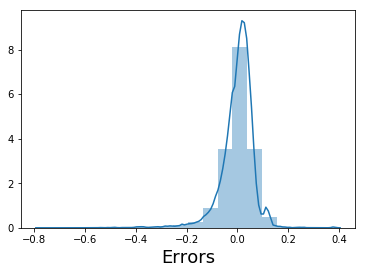

In [260]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(z, bins = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [261]:
# Applying the scaling on the test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [262]:
df_test.describe()

,state_code,distt._code,total_ever_married_women_x,parity_0,parity_1,parity_2,parity_3,parity_4,parity_5,parity_6,...,present_age_60-64,present_age_65-69,present_age_70-74,present_age_75-79,present_age_80+,present_age_all_ages,present_age_less_than_15,all/sc/st_all,all/sc/st_sc,all/sc/st_st
count,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,...,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000,24824.000000
mean,17.927570,14.806115,0.000840,0.000725,0.001035,0.001148,0.001024,0.000803,0.000677,0.000618,...,0.062359,0.063044,0.062158,0.059338,0.059861,0.065058,0.058733,0.358443,0.338785,0.302772
std,9.243687,13.622156,0.008589,0.007671,0.011923,0.013134,0.010753,0.007952,0.006600,0.006098,...,0.241811,0.243047,0.241446,0.236260,0.237235,0.246633,0.235130,0.479553,0.473306,0.459466
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,5.000000,0.000009,0.000007,0.000007,0.000006,0.000004,0.000004,0.000002,0.000002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,11.000000,0.000060,0.000041,0.000049,0.000046,0.000045,0.000044,0.000037,0.000033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.000000,21.000000,0.000287,0.000207,0.000260,0.000268,0.000286,0.000261,0.000224,0.000208,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,70.000000,0.545411,0.518892,0.876653,0.855638,0.630449,0.453404,0.371719,0.360496,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
# Dividing into X_test and y_test
y_test = df_test.pop('total_survival_rate')
X_test = df_test

In [265]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['ttl_surv._child._m', 'last_year’s_births_of_order_7+',\
       'parity_6_%', 'parity_7+_%', 'parity_5_%', 'ttl_surv._child._m_%',\
       'ttl_surv._child._f_%']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [266]:
X_test_new

,const,ttl_surv._child._m,last_year’s_births_of_order_7+,parity_6_%,parity_7+_%,parity_5_%,ttl_surv._child._m_%,ttl_surv._child._f_%
11538,1.0,2.910604e-04,0.000317,0.064668,0.048967,0.126320,0.527674,0.472326
45879,1.0,5.949274e-07,0.000000,0.062500,0.187500,0.250000,0.603175,0.396825
67810,1.0,8.480847e-05,0.000063,0.017432,0.013504,0.065308,0.511810,0.488190
67785,1.0,1.802943e-04,0.000000,0.129424,0.215475,0.150416,0.531303,0.468697
31717,1.0,5.456111e-05,0.000028,0.003641,0.010559,0.008192,0.518447,0.481553
15098,1.0,1.151341e-04,0.000000,0.141224,0.305649,0.137861,0.571406,0.428594
20594,1.0,8.950213e-04,0.001250,0.052537,0.065974,0.090352,0.524997,0.475003
73029,1.0,7.827992e-08,0.000000,0.000000,0.000000,0.000000,0.555556,0.444444
71150,1.0,3.721428e-05,0.000000,0.110752,0.308003,0.116411,0.493563,0.506437
29878,1.0,6.476881e-05,0.000000,0.110341,0.243444,0.128649,0.545850,0.454150


In [268]:
# Making predictions
y_pred = lm_8.predict(X_test_new)

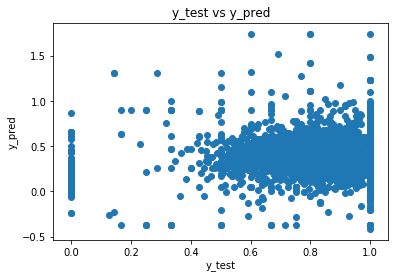

In [269]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred') 
plt.xlabel('y_test') 
plt.ylabel('y_pred')
plt.show()

In [270]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-5.601675067216539

price=−0.1108+0.391×carwidth+0.751×enginesize−0.082×boreratio−0.075×stroke+0.200×bmw+0.110×porsche+0.331×rear+0.168×three+0.203×two

## religion

very high correlation

# education

very high correlation

# economics

In [ ]:
print(economics.info())
print(economics.columns)

In [ ]:
# Seperating into categortical and numric
categorical = economics.select_dtypes(include=['object'])
numeric = economics.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

In [ ]:
numeric.columns

In [ ]:
# Creating dummies
category = ['area_name','total/rural/urban', 'present_age' ,'economic_activity']
dummy = pd.get_dummies(economics[category])
economics_1 = pd.concat([economics, dummy], axis=1)
economics_1 = economics_1.drop(category, axis=1)

In [ ]:
# Converting everything into float for model building
economics_1 = economics_1.astype('float')
economics_1.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = economics_1.drop(['total_survival_rate'], axis=1)
X.head()

In [ ]:
# Putting response variable to y
y = economics_1['total_survival_rate']
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(economics_1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['total_ever_married_women_x', 'parity_0',\
       'parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6',\
       'parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m',\
       'total_children_ever_born_f', 'total_ever_unmarried_women_x',\
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',\
       'parity_5_%', 'parity_6_%', 'parity_7+_%',\
       'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x',\
       'total_children_ever_born_m_%', 'total_children_ever_born_f_%',\
       'no._of_surv._child._0', 'no._of_surv._child._1',\
       'no._of_surv._child._2', 'no._of_surv._child._3',\
       'no._of_surv._child._4', 'no._of_surv._child._5+', 'ttl_surv._child._p',\
       'ttl_surv._child._m', 'ttl_surv._child._f',\
       'total_ever_unmarried_women_%_y', 'total_ever_married_women_%_y',\
       'ttl_surv._child._m_%', 'ttl_surv._child._f_%',\
       'no._of_surv._child._0_%', 'no._of_surv._child._1_%',\
       'no._of_surv._child._2_%', 'no._of_surv._child._3_%',\
       'no._of_surv._child._4_%', 'no._of_surv._child._5+_%', 'total_women',\
       'total_currently_married_women', 'number_of_births_last_year_m',\
       'number_of_births_last_year_f', 'last_year’s_births_of_order_1',\
       'last_year’s_births_of_order_2', 'last_year’s_births_of_order_3',\
       'last_year’s_births_of_order_4', 'last_year’s_births_of_order_5',\
       'last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+',\
       'total_currently_unmarried_women', 'number_of_births_last_year_p',\
       'last_year’s_births_of_order_1_%', 'last_year’s_births_of_order_2_%',\
       'last_year’s_births_of_order_3_%', 'last_year’s_births_of_order_4_%',\
       'last_year’s_births_of_order_5_%', 'last_year’s_births_of_order_6_%',\
       'last_year’s_births_of_order_7+_%', 'number_of_births_last_year_m_%',\
       'number_of_births_last_year_f_%', 'total_currently_unmarried_women_%',\
       'total_currently_married_women_%', 'total_survival_rate']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train

In [ ]:
y_train = df_train.pop('total_survival_rate')
X_train = df_train

In [ ]:
y_train = y_train.to_frame()
y_train

In [ ]:
X_train 

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
lm.params

In [ ]:
#Let's see the summary of our linear model
lm.summary()

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_rfe.drop(["ttl_surv._child._p"], axis = 1)

In [ ]:
# Adding a constant variable 
X_train_new_1 = sm.add_constant(X_train_new)

In [ ]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_new_1).fit()   

In [ ]:
lm_1.params

In [ ]:
#Let's see the summary of our linear model
lm_1.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_1 = X_train_new_1.drop(["total_ever_unmarried_women_%_y"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_1 = sm.add_constant(X_train_new_1)

In [ ]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_new_1).fit()   

In [ ]:
lm_2.params

In [ ]:
#Let's see the summary of our linear model
lm_2.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_2 = X_train_new_1.drop(["last_year’s_births_of_order_5"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_2 = sm.add_constant(X_train_new_2)

In [ ]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_new_2).fit()   

In [ ]:
lm_3.params

In [ ]:
#Let's see the summary of our linear model
lm_3.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_3 = X_train_new_2.drop(["last_year’s_births_of_order_4"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_3 = sm.add_constant(X_train_new_3)

In [ ]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_new_3).fit()

In [ ]:
lm_4.params

In [ ]:
#Let's see the summary of our linear model
lm_4.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_4 = X_train_new_3.drop(["ttl_surv._child._f"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_4 = sm.add_constant(X_train_new_4)

In [ ]:
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_new_4).fit()

In [ ]:
#Let's see the summary of our linear model
lm_5.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_5 = X_train_new_4.drop(["number_of_births_last_year_f"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_5 = sm.add_constant(X_train_new_5)

In [ ]:
# Running the linear model
lm_6 = sm.OLS(y_train,X_train_new_5).fit()

In [ ]:
#Let's see the summary of our linear model
lm_6.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_6 = X_train_new_5.drop(["last_year’s_births_of_order_6"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_6 = sm.add_constant(X_train_new_6)

In [ ]:
# Running the linear model
lm_7 = sm.OLS(y_train,X_train_new_6).fit()

In [ ]:
#Let's see the summary of our linear model
lm_7.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_7 = X_train_new_6.drop(["total_currently_married_women"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_7 = sm.add_constant(X_train_new_7)

In [ ]:
# Running the linear model
lm_8 = sm.OLS(y_train,X_train_new_7).fit()

In [ ]:
lm_8.params

In [ ]:
#Let's see the summary of our linear model
lm_8.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_8 = X_train_new_7.drop(["last_year’s_births_of_order_3"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_8 = sm.add_constant(X_train_new_8)

In [ ]:
# Running the linear model
lm_9 = sm.OLS(y_train,X_train_new_8).fit()

In [ ]:
#Let's see the summary of our linear model
lm_9.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new_9 = X_train_new_8.drop(["ttl_surv._child._m"], axis = 1)

In [ ]:
# Adding a constant variable  
X_train_new_9 = sm.add_constant(X_train_new_9)

In [ ]:
# Running the linear model
lm_10 = sm.OLS(y_train,X_train_new_9).fit()

In [ ]:
lm_10.params

In [ ]:
#Let's see the summary of our linear model
lm_10.summary()

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
y_train_price = lm_10.predict(X_train_new_9)

In [ ]:
y_train

In [ ]:
y_train_price = y_train_price.to_frame()

In [ ]:
z = y_train['total_survival_rate'] - y_train_price[0]
z

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(z, bins = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [ ]:
# Applying the scaling on the test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
df_test.describe()

In [ ]:
# Dividing into X_test and y_test
y_test = df_test.pop('total_survival_rate')
X_test = df_test

In [ ]:
vif['Features'].unique()

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['total_ever_married_women_%_y', 'ttl_surv._child._m_%',\
       'ttl_surv._child._f_%', 'last_year’s_births_of_order_2',\
       'last_year’s_births_of_order_7+']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
X_test_new

In [ ]:
# Making predictions
y_pred = lm_10.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18) 
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

price=−0.1108+0.391×carwidth+0.751×enginesize−0.082×boreratio−0.075×stroke+0.200×bmw+0.110×porsche+0.331×rear+0.168×three+0.203×two